# 2019 2nd ML month with KaKR

In [3]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import seaborn as sns
import os
from os.path import join
import warnings
warnings.filterwarnings("ignore")
import missingno as msno

## Data EDA

In [4]:
# load data
train = pd.read_csv('/Users/mj/Library/CloudStorage/OneDrive-개인/AI_study/data/2019-2nd-ml-month-with-kakr/train.csv')
test = pd.read_csv('/Users/mj/Library/CloudStorage/OneDrive-개인/AI_study/data/2019-2nd-ml-month-with-kakr/test.csv')

display(train.head(), test.head())

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,1,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
2,2,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
3,3,20140627T000000,257500.0,3,2.25,1715,6819,2.0,0,0,...,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819
4,4,20150115T000000,291850.0,3,1.50,1060,9711,1.0,0,0,...,7,1060,0,1963,0,98198,47.4095,-122.315,1650,9711


,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,15035,20141209T000000,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
1,15036,20141209T000000,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
2,15037,20140512T000000,4,4.50,5420,101930,1.0,0,0,3,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930
3,15038,20150415T000000,3,1.00,1780,7470,1.0,0,0,3,7,1050,730,1960,0,98146,47.5123,-122.337,1780,8113
4,15039,20150312T000000,3,2.50,1890,6560,2.0,0,0,3,7,1890,0,2003,0,98038,47.3684,-122.031,2390,7570


**data 설명**
- ID : 집을 구분하는 번호
- date : 집을 구매한 날짜
- price : 집의 가격(Target variable)
- bedrooms : 침실의 수
- bathrooms : 화장실의 수
- sqft_living : 주거 공간의 평방 피트(면적)
- sqft_lot : 부지의 평방 피트(면적)
- floors : 집의 층 수
- waterfront : 집의 전방에 강이 흐르는지 유무 (a.k.a. 리버뷰)
- view : 집이 얼마나 좋아 보이는지의 정도
- condition : 집의 전반적인 상태
- grade : King County grading 시스템 기준으로 매긴 집의 등급
- sqft_above : 지하실을 제외한 평방 피트(면적)
- sqft_basement : 지하실의 평방 피트(면적)
- yr_built : 지어진 년도
- yr_renovated : 집을 재건축한 년도
- zipcode : 우편번호
- lat : 위도
- long : 경도
- sqft_living15 : 2015년 기준 주거 공간의 평방 피트(면적, 집을 재건축했다면, 변화가 있을 수 있음)
- sqft_lot15 : 2015년 기준 부지의 평방 피트(면적, 집을 재건축했다면, 변화가 있을 수 있음)

In [5]:
train.shape

(15035, 21)

In [6]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6468 entries, 0 to 6467
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             6468 non-null   int64  
 1   date           6468 non-null   object 
 2   bedrooms       6468 non-null   int64  
 3   bathrooms      6468 non-null   float64
 4   sqft_living    6468 non-null   int64  
 5   sqft_lot       6468 non-null   int64  
 6   floors         6468 non-null   float64
 7   waterfront     6468 non-null   int64  
 8   view           6468 non-null   int64  
 9   condition      6468 non-null   int64  
 10  grade          6468 non-null   int64  
 11  sqft_above     6468 non-null   int64  
 12  sqft_basement  6468 non-null   int64  
 13  yr_built       6468 non-null   int64  
 14  yr_renovated   6468 non-null   int64  
 15  zipcode        6468 non-null   int64  
 16  lat            6468 non-null   float64
 17  long           6468 non-null   float64
 18  sqft_liv

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15035 entries, 0 to 15034
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             15035 non-null  int64  
 1   date           15035 non-null  object 
 2   price          15035 non-null  float64
 3   bedrooms       15035 non-null  int64  
 4   bathrooms      15035 non-null  float64
 5   sqft_living    15035 non-null  int64  
 6   sqft_lot       15035 non-null  int64  
 7   floors         15035 non-null  float64
 8   waterfront     15035 non-null  int64  
 9   view           15035 non-null  int64  
 10  condition      15035 non-null  int64  
 11  grade          15035 non-null  int64  
 12  sqft_above     15035 non-null  int64  
 13  sqft_basement  15035 non-null  int64  
 14  yr_built       15035 non-null  int64  
 15  yr_renovated   15035 non-null  int64  
 16  zipcode        15035 non-null  int64  
 17  lat            15035 non-null  float64
 18  long  

In [8]:
# column별 결측치 확인
train.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [9]:
# skew 확인 : date 제외
n_feats = train.dtypes[train.dtypes != 'object'].index

for col in n_feats:
    print(f'{col} skewness : {train[col].skew():.2f}')

id skewness : 0.00
price skewness : 4.29
bedrooms skewness : 0.52
bathrooms skewness : 0.51
sqft_living skewness : 1.49
sqft_lot skewness : 13.35
floors skewness : 0.59
waterfront skewness : 11.73
view skewness : 3.38
condition skewness : 1.04
grade skewness : 0.75
sqft_above skewness : 1.43
sqft_basement skewness : 1.56
yr_built skewness : -0.47
yr_renovated skewness : 4.57
zipcode skewness : 0.41
lat skewness : -0.49
long skewness : 0.92
sqft_living15 skewness : 1.13
sqft_lot15 skewness : 10.03


In [10]:
# target값 log 변환
import numpy as np

y = train['price']
y_copy = y.copy()
y= np.log1p(y)

In [11]:
train['price']

0         221900.0
1         180000.0
2         510000.0
3         257500.0
4         291850.0
           ...    
15030     610685.0
15031    1007500.0
15032     360000.0
15033     400000.0
15034     325000.0
Name: price, Length: 15035, dtype: float64

In [12]:
for df in [train, test]:
    df['date'] = df['date'].apply(lambda i: i[:6]).astype(int)
    df['year'] = df['date'].apply(lambda i: int(str(i)[:4]))
    df['month'] = df['date'].apply(lambda i: int(str(i)[4:]))

<Axes: >

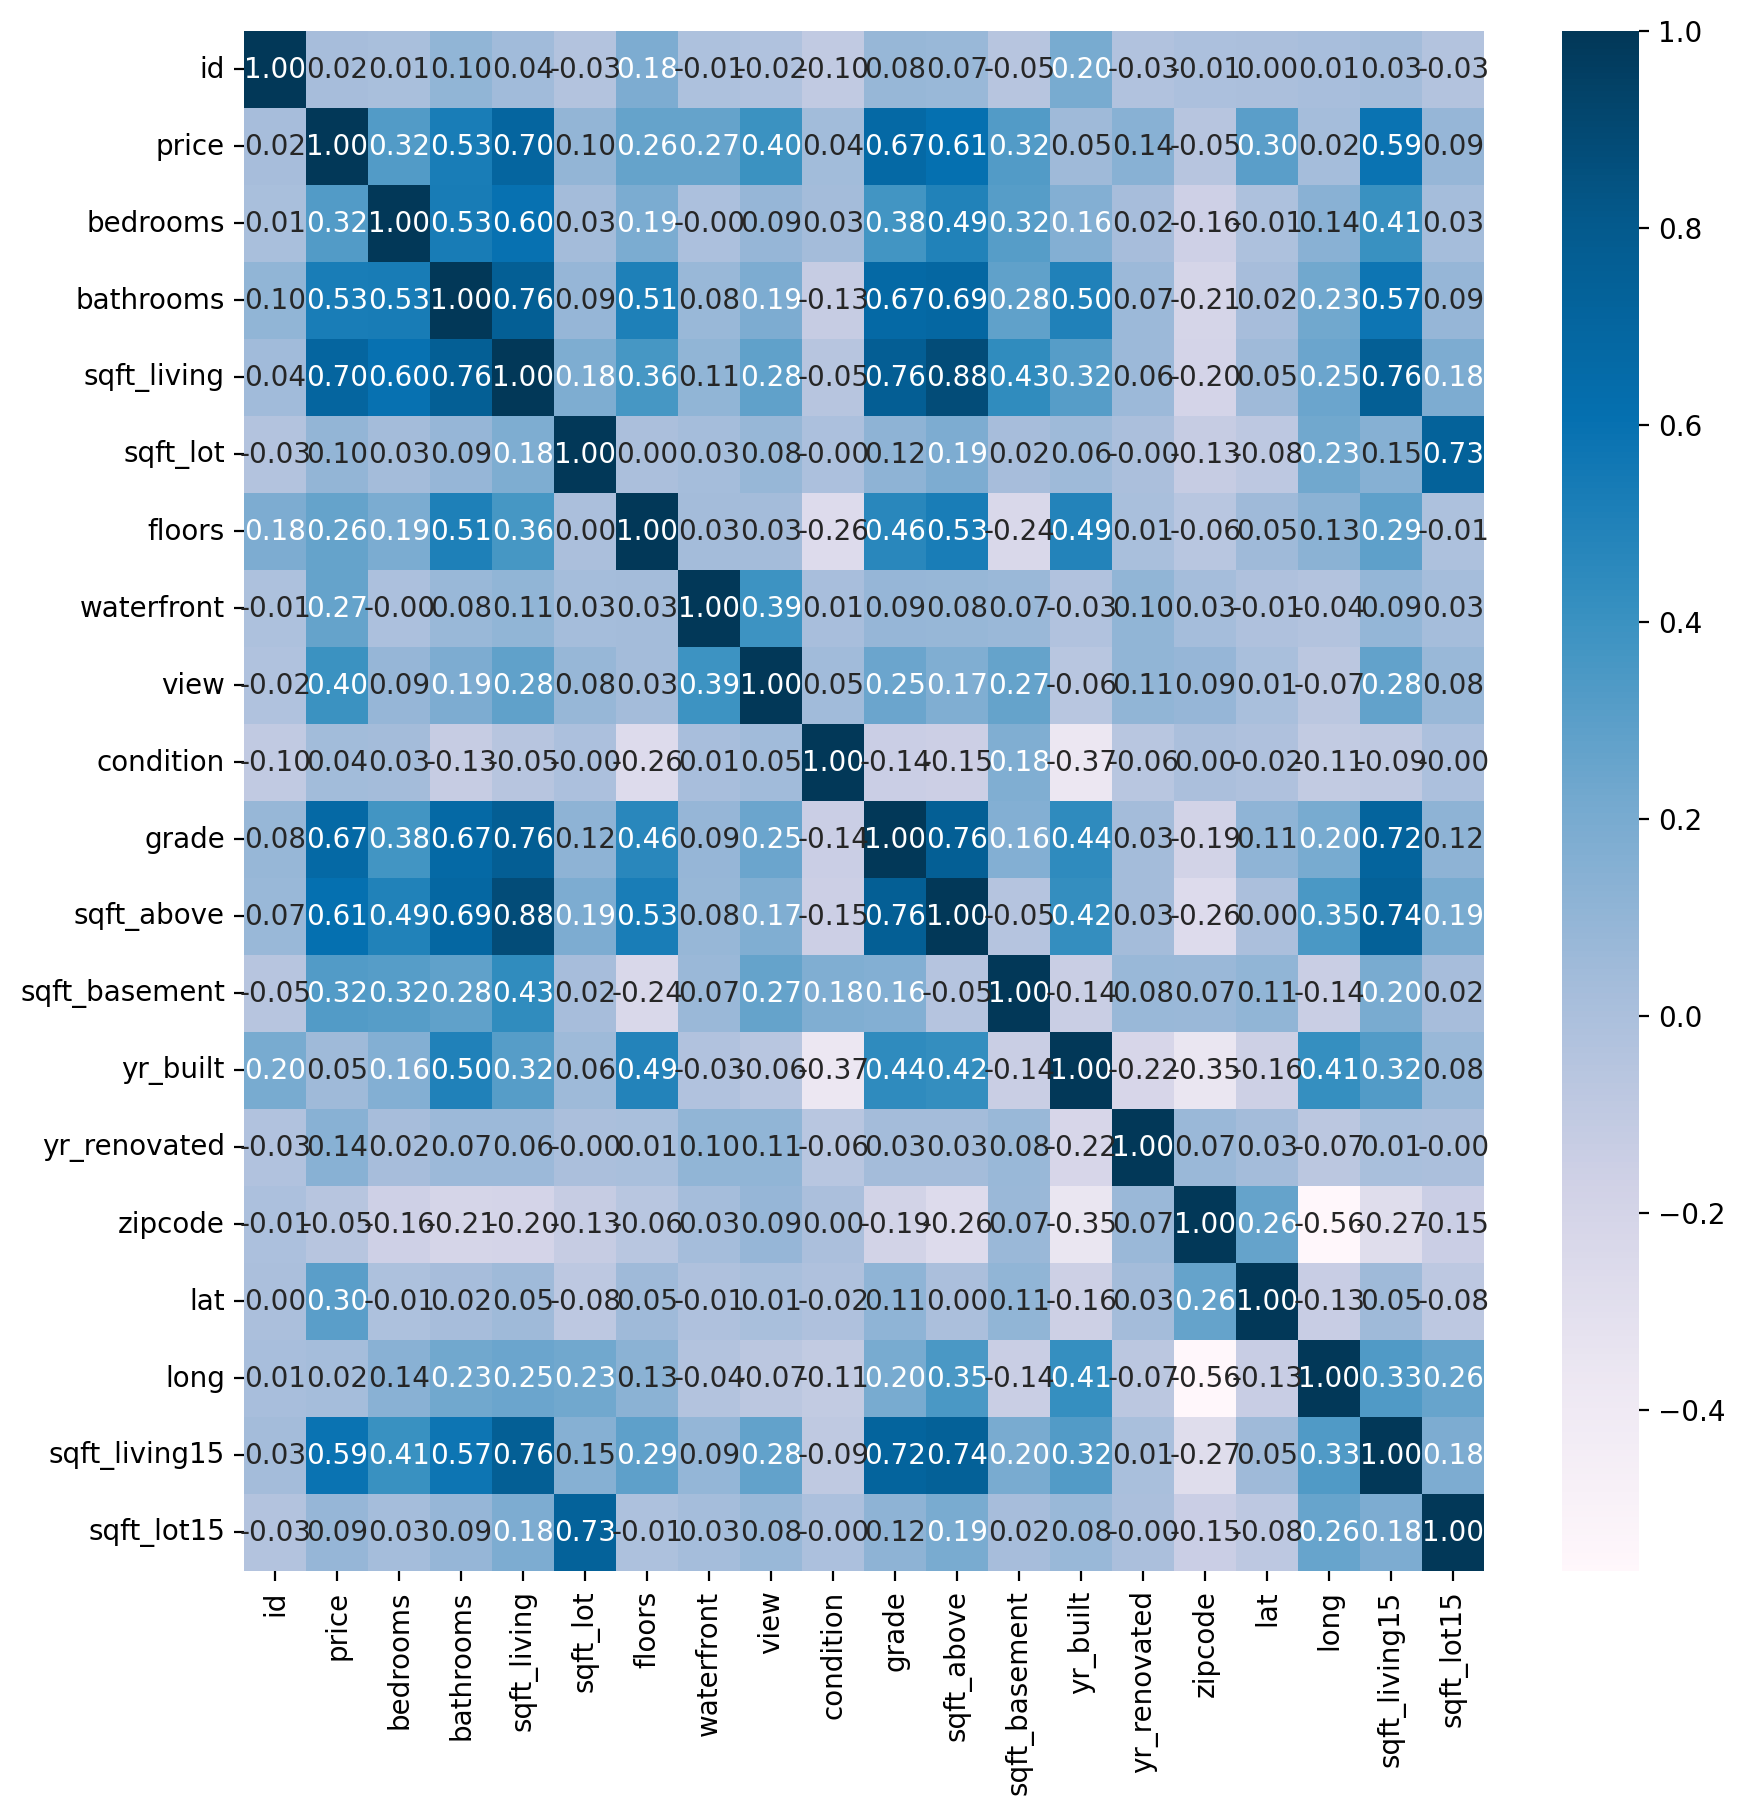

In [13]:
# 상관관계 - heatmap

corr_data = train[n_feats].corr()

plt.figure(figsize=(10,10))
sns.heatmap(corr_data, annot=True, fmt='.2f', cmap='PuBu')


Index(['price', 'sqft_living', 'grade', 'sqft_above', 'sqft_living15',
       'bathrooms', 'view', 'bedrooms', 'sqft_basement', 'lat'],
      dtype='object')


<Axes: >

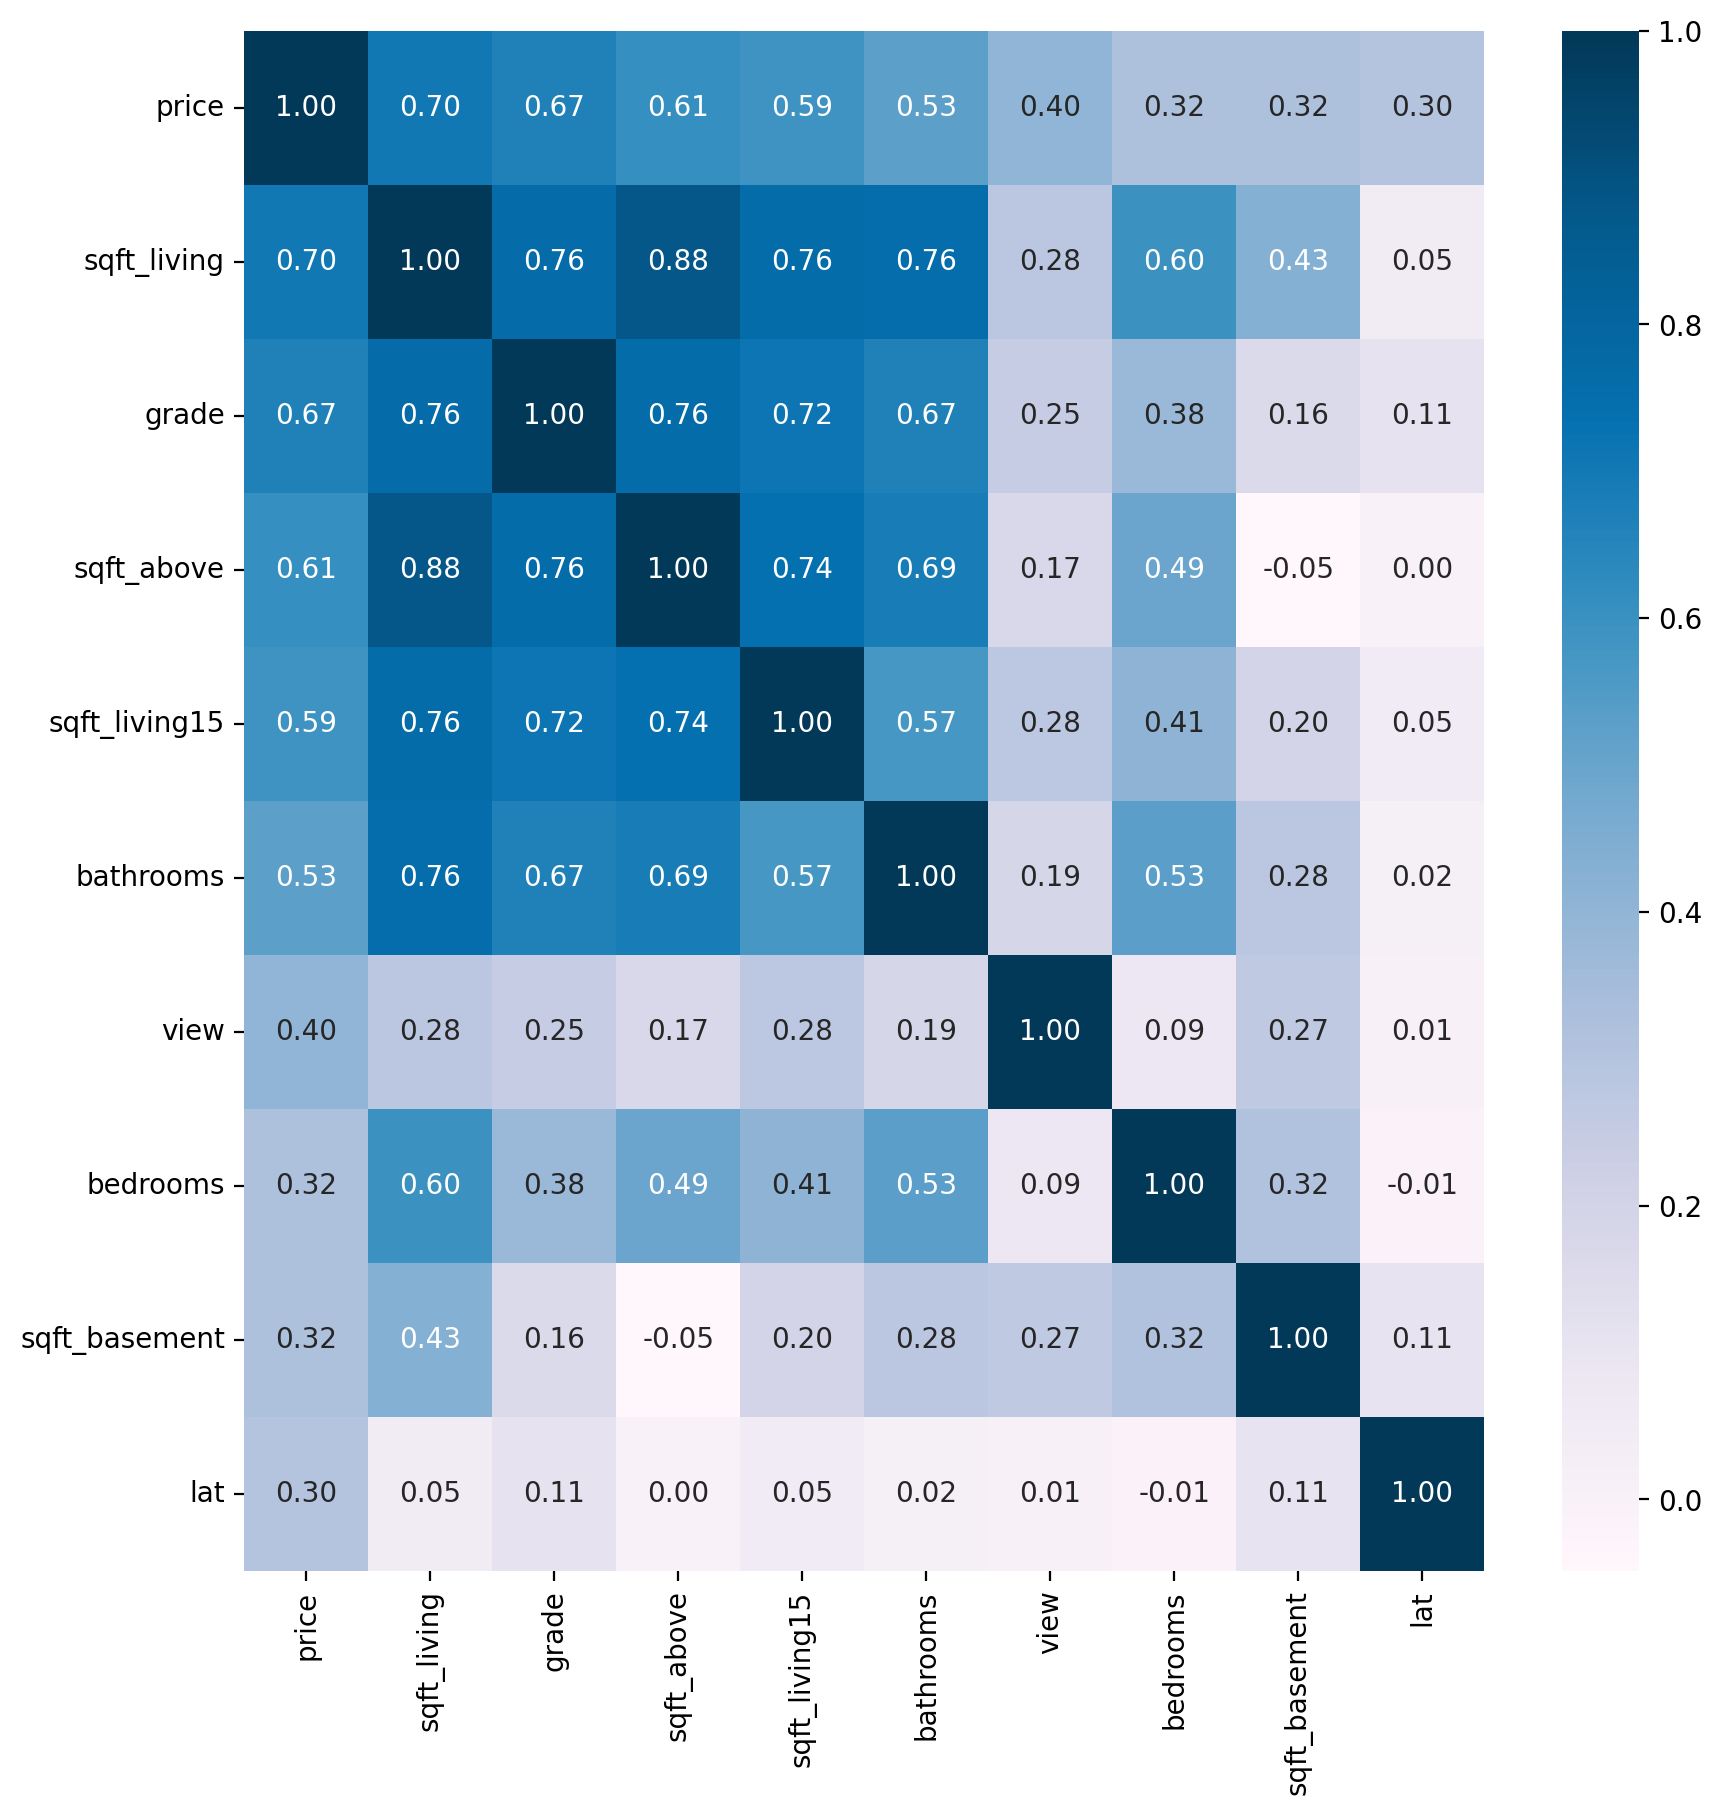

In [14]:
# 가장 높은 상위 10개 feature
k = 10
cols = corr_data.nlargest(k, 'price')['price'].index
print(cols)

f, ax = plt.subplots(figsize=(10,10))
sns.heatmap(train[cols].corr(), annot=True, fmt='.2f', cmap='PuBu')

<Axes: xlabel='sqft_lot15', ylabel='price'>

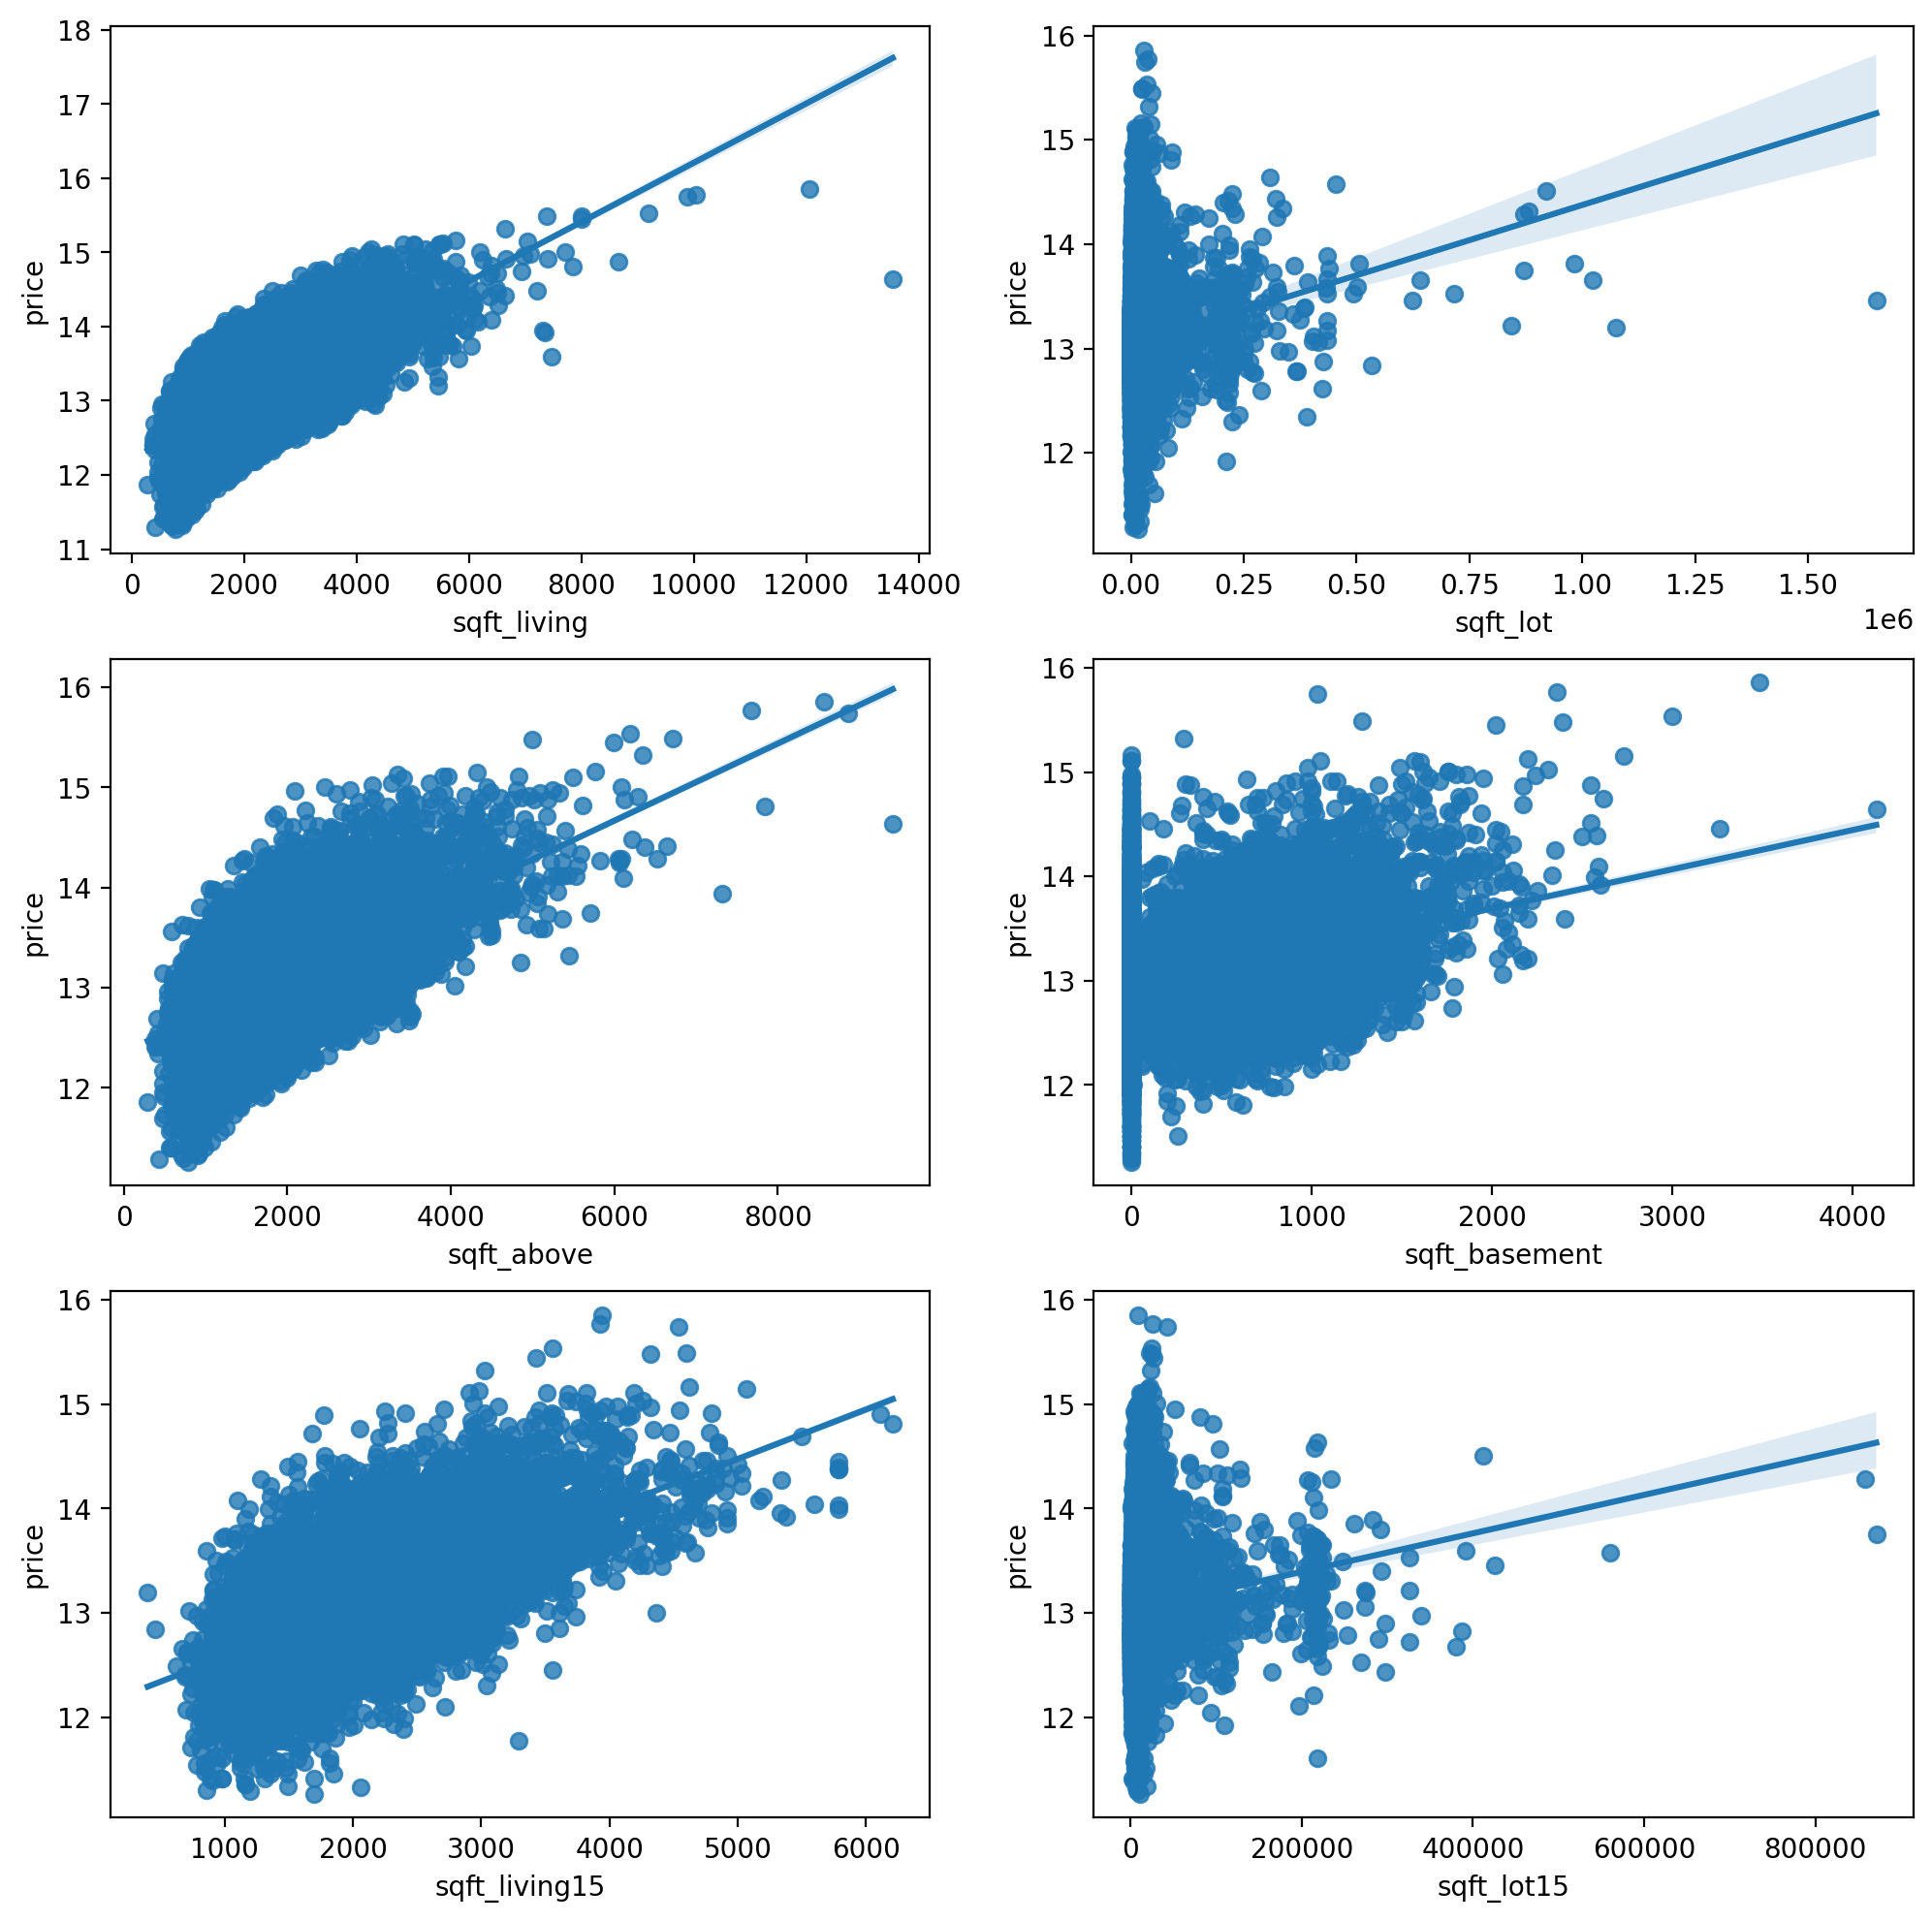

In [15]:
# 수치형 시각화  - 면적
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(nrows=3, ncols=2, figsize=(12,12))

# sqft_living - price
sns.regplot(x='sqft_living', y=y, data=train, ax=ax1)
# sqft_lot - price
sns.regplot(x='sqft_lot', y=y, data=train, ax=ax2)

# sqft_above - price
sns.regplot(x='sqft_above', y=y, data=train, ax=ax3)

# sqft_basement - price
sns.regplot(x='sqft_basement', y=y, data=train, ax=ax4)

# sqft_living15 - price
sns.regplot(x='sqft_living15', y=y, data=train, ax=ax5)

# sqft_lot15 - price
sns.regplot(x='sqft_lot15', y=y, data=train, ax=ax6)


In [16]:
# categorical 시각화 - grade; 높을수록 좋음, 3등급이 5등급이랑 비슷; 이상치?

train[['grade', 'price']].groupby(['grade']).describe()

price                                                               \
        count          mean           std        min        25%        50%   
grade                                                                        
1         1.0  1.420000e+05           NaN   142000.0   142000.0   142000.0   
3         2.0  2.710000e+05  1.272792e+04   262000.0   266500.0   271000.0   
4        23.0  2.097413e+05  9.610089e+04    80000.0   145000.0   200000.0   
5       174.0  2.510696e+05  1.248287e+05    78000.0   172375.0   227475.0   
6      1406.0  3.001554e+05  1.210734e+05    84000.0   215000.0   274600.0   
7      6228.0  4.015281e+05  1.538019e+05    90000.0   285000.0   375000.0   
8      4207.0  5.423156e+05  2.146832e+05   140000.0   390000.0   512500.0   
9      1855.0  7.734781e+05  3.158378e+05   230000.0   570500.0   725000.0   
10      781.0  1.062482e+06  4.710331e+05   316000.0   767450.0   908990.0   
11      288.0  1.522459e+06  7.345273e+05   550000.0  1036500.0  1288000.0   
12       61.0  2.220540e+06  1.036576e+06   835000.0  1550000.0  1820000.0   
13        9.0  4.132333e+06  2.085904e+06  1780000.0  2888000.0  3200000.0   

                             
             75%        max  
grade                        
1       142000.0   142000.0  
3       275500.0   280000.0  
4       256500.0   435000.0  
5       297500.0   795000.0  
6       365000.0  1052000.0  
7       485000.0  2050000.0  
8       640000.0  2700000.0  
9       878500.0  2546000.0  
10     1250000.0  3600000.0  
11     1798750.0  7062500.0  
12     2725000.0  5350000.0  
13     5570000.0  7700000.0

<Axes: xlabel='grade', ylabel='price'>

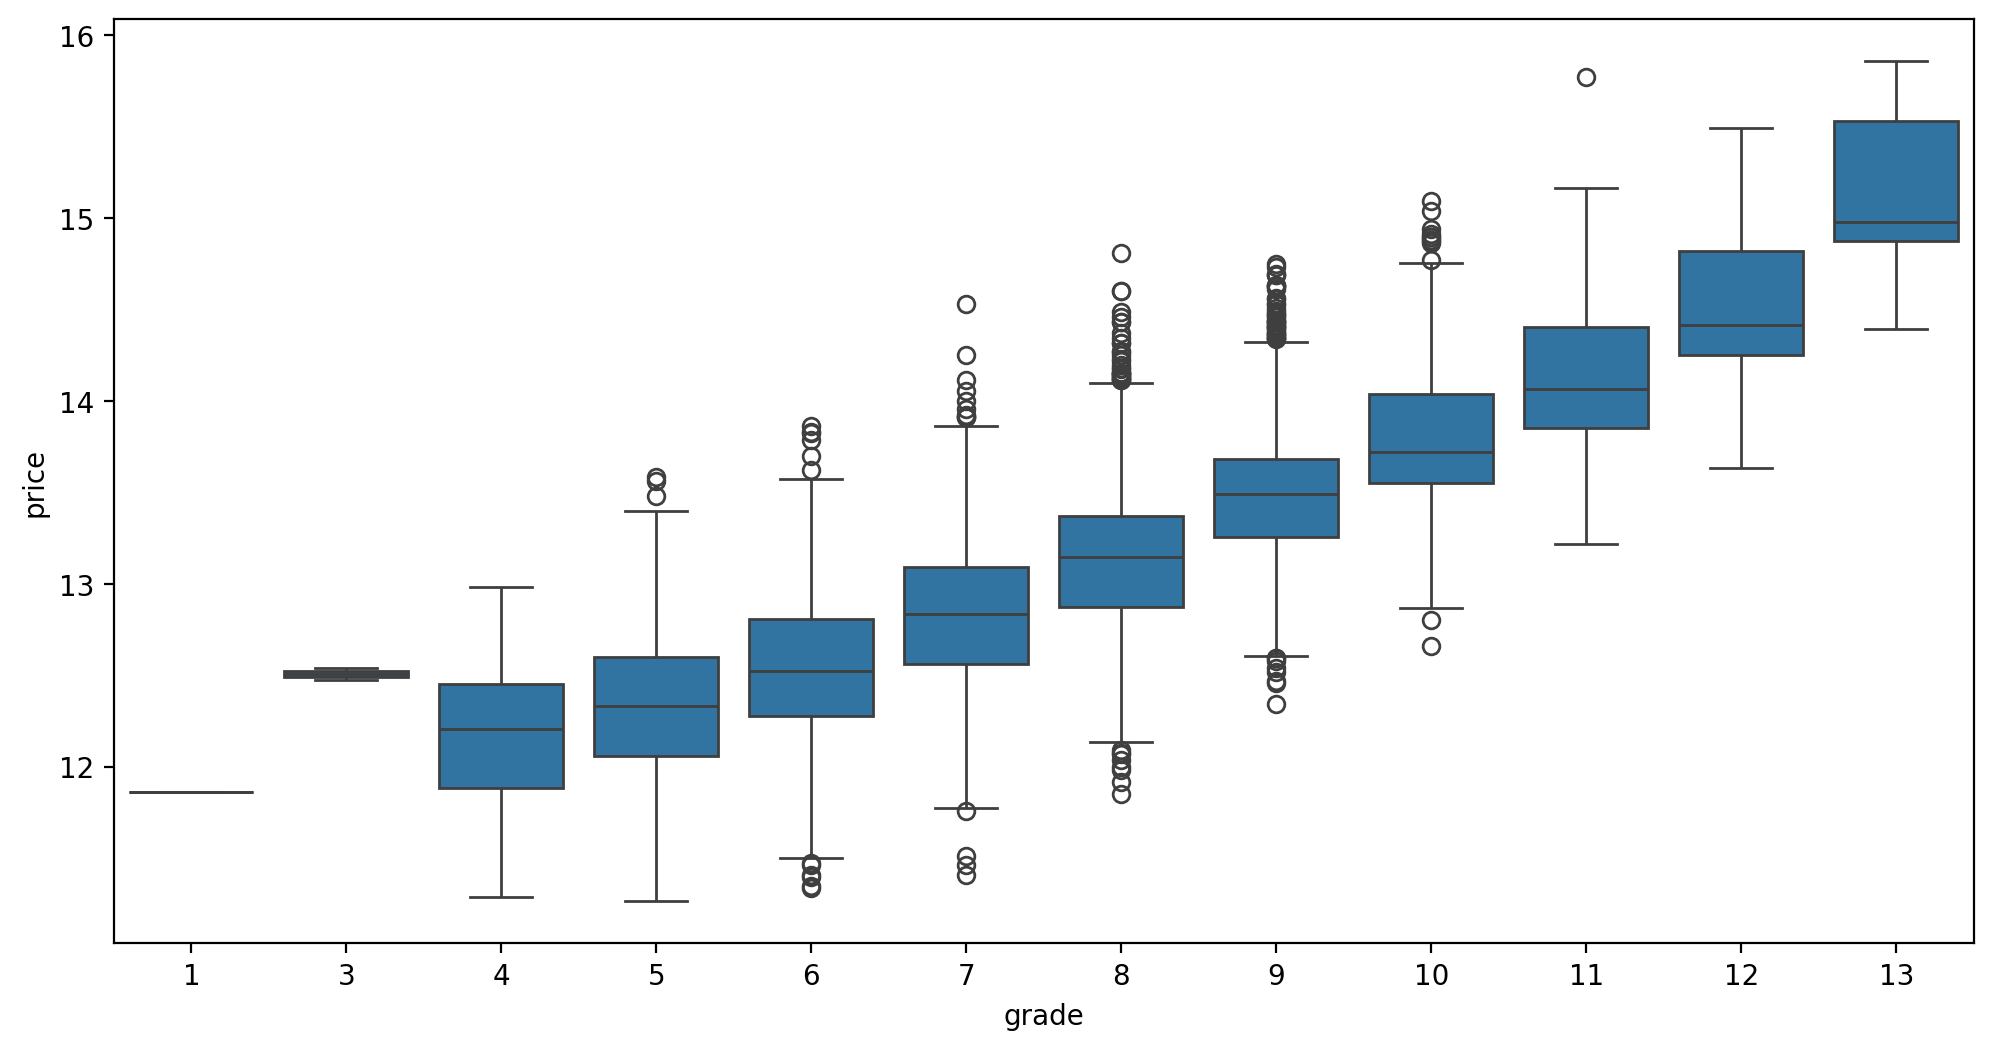

In [17]:
# boxplot
fig, ax = plt.subplots(figsize=(12,6))

sns.boxplot(x='grade', y=y, data=train, ax=ax)

In [18]:
# 방 수 : 방 개수 많을수록 가격이 높음
train[['bedrooms', 'price']].groupby(['bedrooms']).describe()

price                                                             \
           count          mean            std       min       25%       50%   
bedrooms                                                                      
0            4.0  2.405000e+05   74505.033387  142000.0  211750.0  250000.0   
1          133.0  3.102892e+05  130347.761527   80000.0  229000.0  293000.0   
2         1931.0  3.992137e+05  194900.840176   78000.0  265000.0  370000.0   
3         6835.0  4.657418e+05  261322.681915   89000.0  298850.0  413450.0   
4         4797.0  6.340614e+05  382654.331315  100000.0  375000.0  549995.0   
5         1108.0  8.022583e+05  618801.129768  133000.0  439937.5  625000.0   
6          188.0  8.714031e+05  914632.397633  230000.0  433750.0  664500.0   
7           22.0  9.669480e+05  735405.765394  280000.0  539250.0  740000.0   
8           10.0  1.135300e+06  921998.318870  340000.0  601250.0  754000.0   
9            5.0  7.927998e+05  324267.322437  450000.0  599999.0  700000.0   
10           2.0  8.990000e+05  352139.177031  650000.0  774500.0  899000.0   

                                
                75%        max  
bedrooms                        
0          278750.0   320000.0  
1          385000.0   680000.0  
2          485000.0  1998000.0  
3          560000.0  3600000.0  
4          770000.0  3850000.0  
5          931300.0  7062500.0  
6          927500.0  7700000.0  
7          970475.0  2885000.0  
8         1462500.0  3300000.0  
9          934000.0  1280000.0  
10        1023500.0  1148000.0

<Axes: xlabel='bedrooms', ylabel='price'>

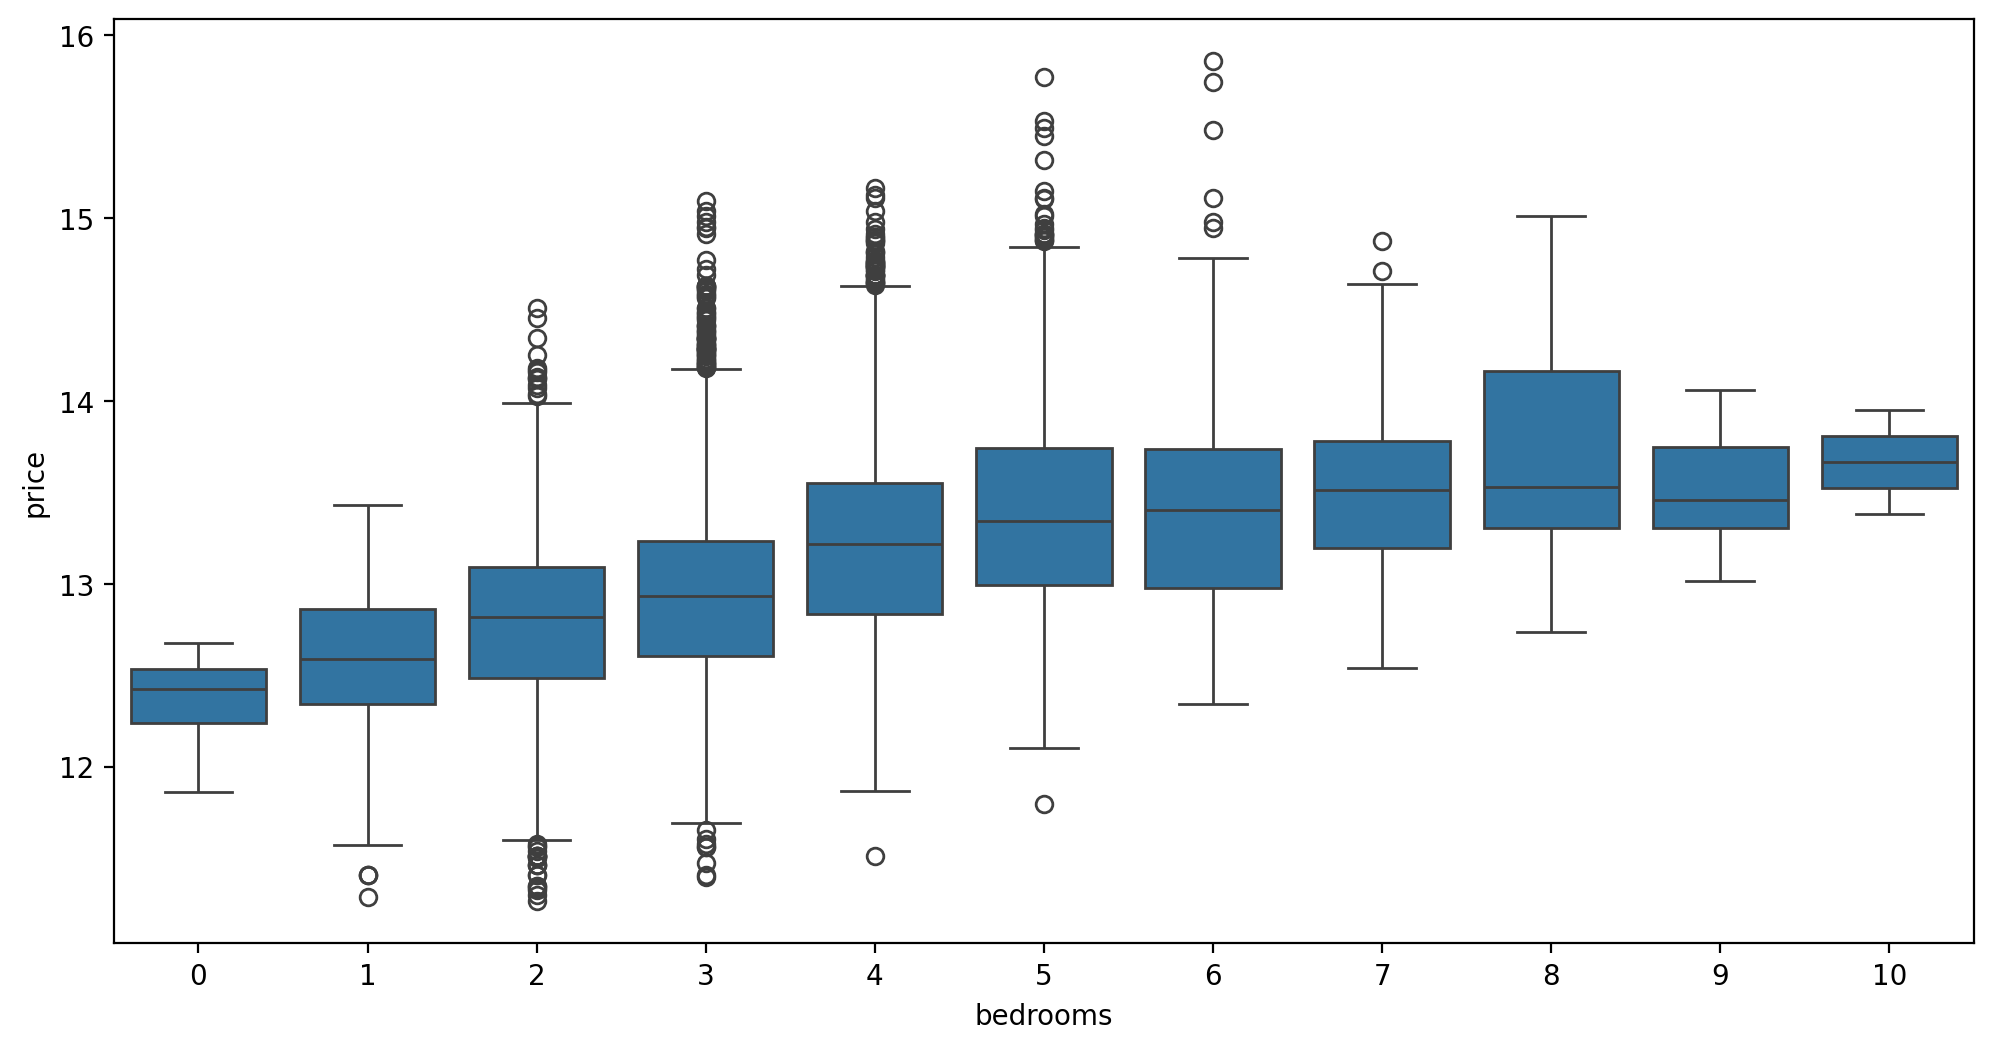

In [19]:
# boxplot
fig, ax = plt.subplots(figsize=(12,6))

sns.boxplot(x='bedrooms', y=y, data=train, ax=ax)


In [20]:
# bathrooms
train[['bathrooms', 'price']].groupby(['bathrooms']).describe()

price                                                    \
            count          mean           std        min        25%   
bathrooms                                                             
0.00          4.0  2.852500e+05  1.444239e+05   142000.0   211750.0   
0.50          3.0  2.123333e+05  8.994072e+04   109000.0   182000.0   
0.75         45.0  2.812389e+05  1.360876e+05    80000.0   190000.0   
1.00       2675.0  3.469929e+05  1.550331e+05    78000.0   230000.0   
1.25          5.0  6.082900e+05  4.511401e+05   275000.0   321950.0   
1.50       1009.0  4.052911e+05  1.848993e+05   107000.0   268000.0   
1.75       2112.0  4.516214e+05  1.954409e+05   137900.0   310000.0   
2.00       1357.0  4.628095e+05  2.075399e+05   133000.0   310000.0   
2.25       1433.0  5.309718e+05  2.758159e+05   160000.0   336750.0   
2.50       3748.0  5.558889e+05  2.691441e+05   153503.0   364997.0   
2.75        843.0  6.632313e+05  3.027376e+05   183750.0   449725.0   
3.00        493.0  7.151572e+05  4.336109e+05   154000.0   432500.0   
3.25        410.0  9.857819e+05  5.754154e+05   279900.0   599962.5   
3.50        510.0  9.180195e+05  4.782530e+05   216650.0   600000.0   
3.75        108.0  1.244784e+06  6.239338e+05   345100.0   806625.0   
4.00        100.0  1.247460e+06  7.051227e+05   265000.0   761250.0   
4.25         57.0  1.512515e+06  7.048725e+05   490000.0   955000.0   
4.50         64.0  1.329664e+06  9.683508e+05   290000.0   808000.0   
4.75         16.0  2.028452e+06  8.908661e+05   599000.0  1361250.0   
5.00         14.0  1.713750e+06  1.372669e+06   343000.0   687375.0   
5.25         11.0  1.898391e+06  1.336079e+06   300000.0  1211500.0   
5.50          7.0  2.640429e+06  1.238211e+06   925000.0  1875000.0   
5.75          3.0  2.683333e+06  2.596080e+06   540000.0  1240000.0   
6.00          2.0  4.467500e+06  1.177333e+06  3635000.0  4051250.0   
6.25          1.0  2.888000e+06           NaN  2888000.0  2888000.0   
6.75          1.0  8.000000e+05           NaN   800000.0   800000.0   
7.50          1.0  4.500000e+05           NaN   450000.0   450000.0   
7.75          1.0  6.885000e+06           NaN  6885000.0  6885000.0   
8.00          2.0  4.990000e+06  3.832519e+06  2280000.0  3635000.0   

                                             
                 50%         75%        max  
bathrooms                                    
0.00        257500.0   331000.00   484000.0  
0.50        255000.0   264000.00   273000.0  
0.75        250000.0   350000.00   785000.0  
1.00        320000.0   427350.00  1300000.0  
1.25        516500.0   540000.00  1388000.0  
1.50        369500.0   485000.00  1465000.0  
1.75        420000.0   550338.75  2100000.0  
2.00        430000.0   565000.00  2200000.0  
2.25        468000.0   625000.00  2400000.0  
2.50        500000.0   675000.00  2903000.0  
2.75        615000.0   798400.00  2180000.0  
3.00        610000.0   855000.00  3100000.0  
3.25        842000.0  1200000.00  3640900.0  
3.50        810000.0  1109365.00  3710000.0  
3.75       1137500.0  1528000.00  3650000.0  
4.00       1050000.0  1493750.00  3400000.0  
4.25       1400000.0  1900000.00  3850000.0  
4.50       1061500.0  1577222.50  7062500.0  
4.75       1947500.0  2647500.00  3650000.0  
5.00       1512500.0  1846250.00  5350000.0  
5.25       1415000.0  2354000.00  5110800.0  
5.50       2525000.0  3391500.00  4500000.0  
5.75       1940000.0  3755000.00  5570000.0  
6.00       4467500.0  4883750.00  5300000.0  
6.25       2888000.0  2888000.00  2888000.0  
6.75        800000.0   800000.00   800000.0  
7.50        450000.0   450000.00   450000.0  
7.75       6885000.0  6885000.00  6885000.0  
8.00       4990000.0  6345000.00  7700000.0

<Axes: xlabel='bathrooms', ylabel='price'>

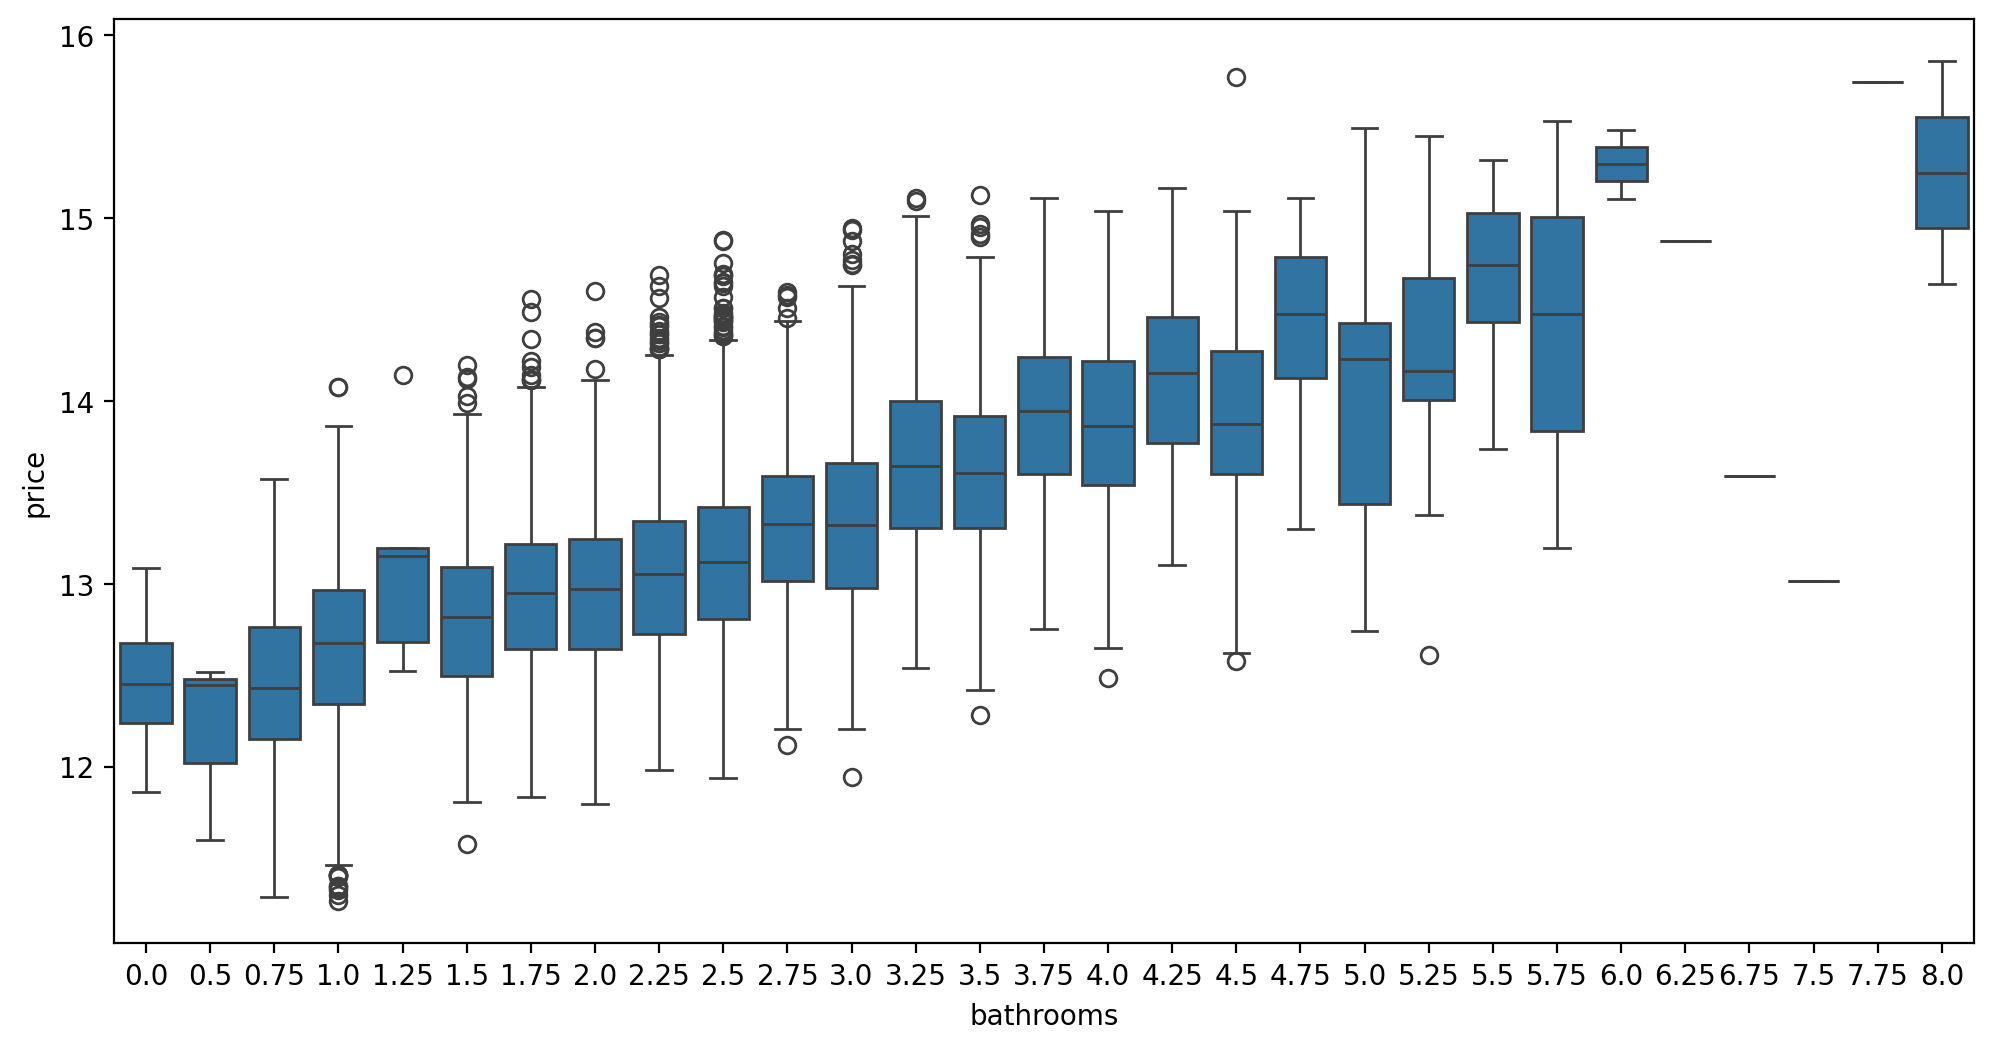

In [21]:
# boxplot
fig, ax = plt.subplots(figsize=(12,6))

sns.boxplot(x='bathrooms', y=y, data=train, ax=ax)


In [22]:
# floors
train[['floors', 'price']].groupby(['floors']).describe()

price                                                            \
         count          mean           std       min       25%       50%   
floors                                                                     
1.0     7361.0  4.396829e+05  2.594990e+05   78000.0  275000.0  389000.0   
1.5     1330.0  5.577378e+05  3.116443e+05  123000.0  350000.0  525000.0   
2.0     5810.0  6.503442e+05  4.391244e+05   90000.0  379500.0  545900.0   
2.5      113.0  1.022214e+06  8.995638e+05  255000.0  542500.0  750000.0   
3.0      417.0  6.045992e+05  3.759388e+05  208400.0  385000.0  500000.0   
3.5        4.0  1.184750e+06  1.410645e+06  435000.0  468000.0  502000.0   

                              
              75%        max  
floors                        
1.0      525000.0  3800000.0  
1.5      690000.0  3650000.0  
2.0      775000.0  7062500.0  
2.5     1225000.0  7700000.0  
3.0      640000.0  3100000.0  
3.5     1218750.0  3300000.0

<Axes: xlabel='floors', ylabel='price'>

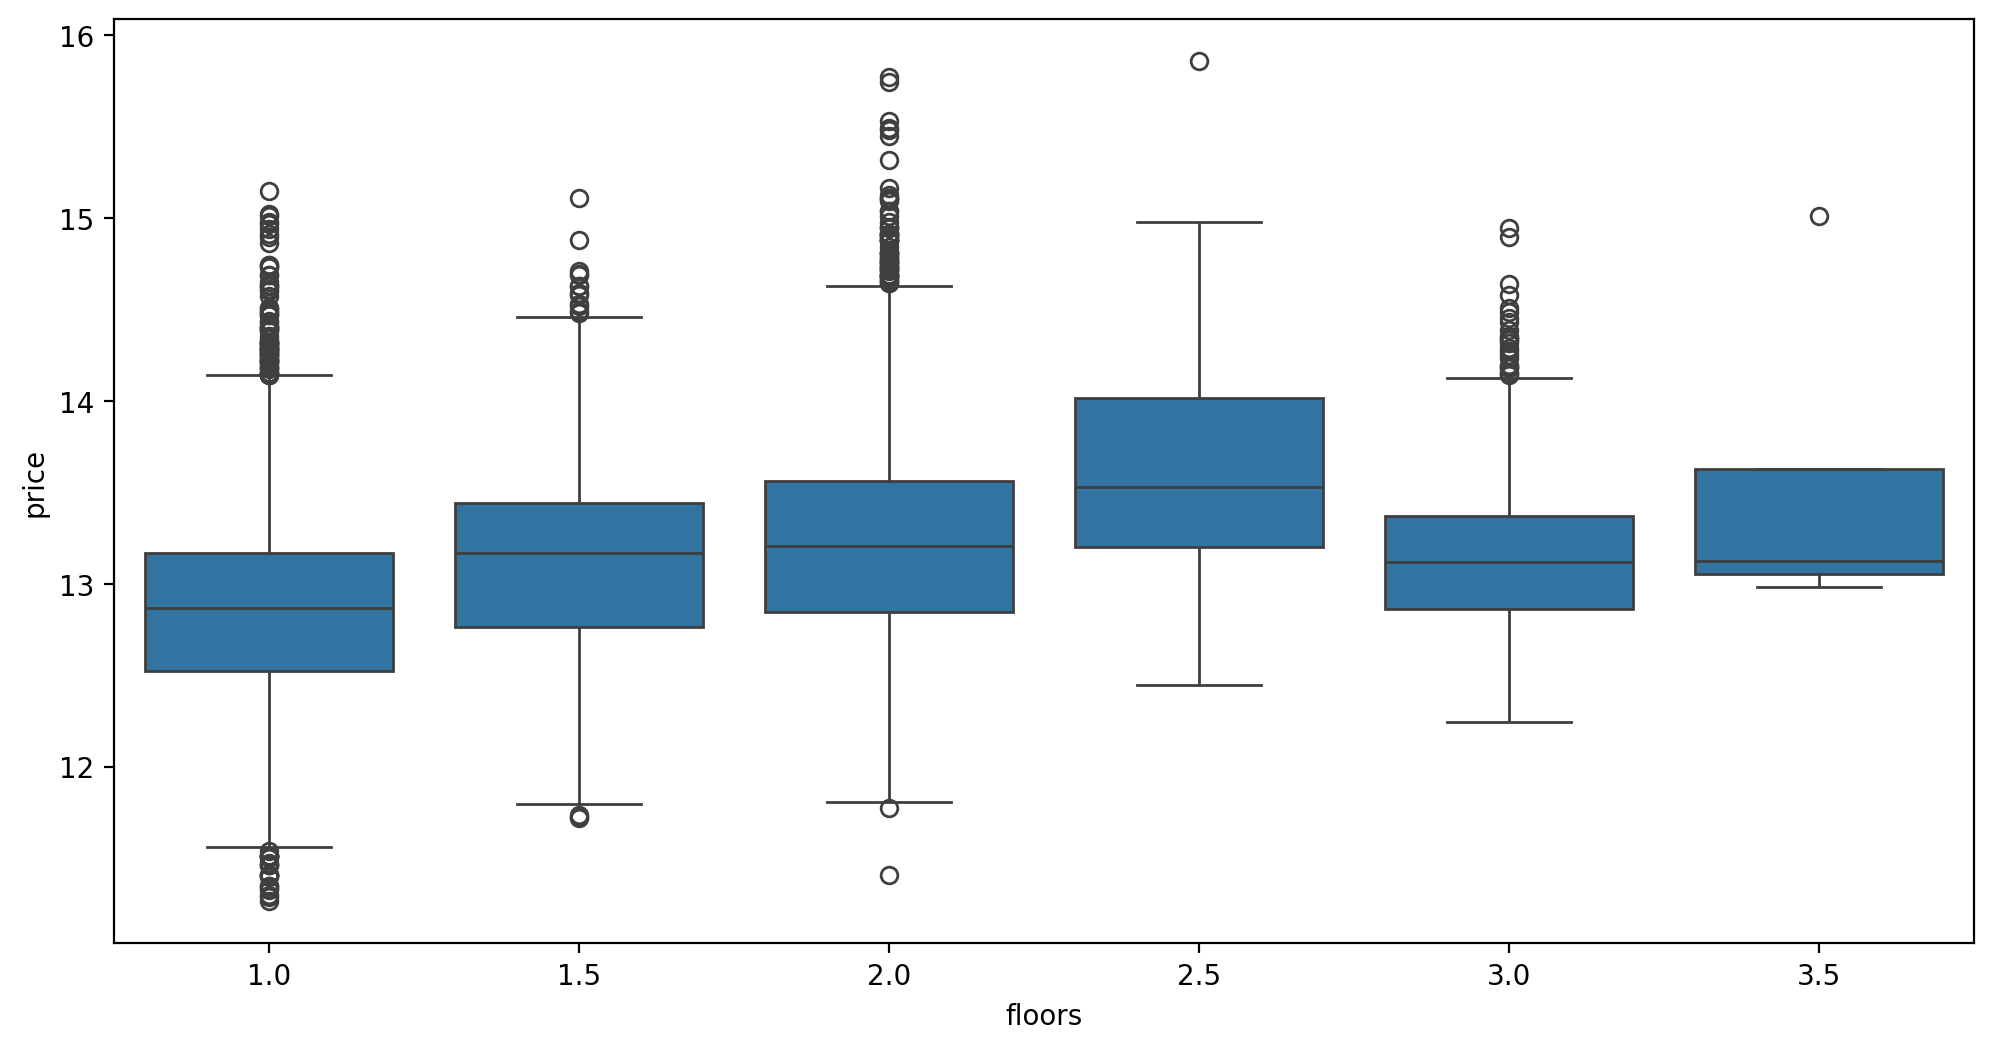

In [23]:
# boxplot
fig, ax = plt.subplots(figsize=(12,6))

sns.boxplot(x='floors', y=y, data=train, ax=ax)

In [24]:
# waterfront
train[['waterfront', 'price']].groupby(['waterfront']).describe()

price                                                  \
              count          mean           std       min       25%   
waterfront                                                            
0           14928.0  5.323243e+05  3.452737e+05   78000.0  320000.0   
1             107.0  1.706784e+06  1.186021e+06  285000.0  780000.0   

                                             
                  50%        75%        max  
waterfront                                   
0            450000.0   640000.0  7700000.0  
1           1517000.0  2215000.0  7062500.0

In [25]:
# view
train[['view', 'price']].groupby(['view']).describe()

price                                                             \
        count          mean           std       min       25%        50%   
view                                                                       
0     13548.0  4.962857e+05  2.844006e+05   78000.0  311000.0   433000.0   
1       241.0  7.872060e+05  5.083995e+05  217000.0  480000.0   670000.0   
2       665.0  8.056546e+05  5.437523e+05  169317.0  485000.0   680000.0   
3       373.0  9.866276e+05  6.457858e+05  154000.0  560000.0   800000.0   
4       208.0  1.499979e+06  1.012712e+06  252000.0  817500.0  1187500.0   

                            
            75%        max  
view                        
0      600000.0  5570000.0  
1      875000.0  3650000.0  
2      950000.0  7062500.0  
3     1298000.0  7700000.0  
4     1899250.0  6885000.0

In [26]:
# condition
train[['condition', 'price']].groupby(['condition']).describe()

price                                                              \
            count           mean            std       min       25%       50%   
condition                                                                       
1            21.0  276592.857143  171129.508184   78000.0  130000.0  252000.0   
2           110.0  325228.945455  272459.077436   80000.0  188250.0  279000.0   
3          9793.0  541062.528337  365380.221604   83000.0  329950.0  450000.0   
4          3956.0  526107.457533  371959.694139   89000.0  305000.0  445000.0   
5          1155.0  612704.427706  414868.804032  110000.0  350000.0  525000.0   

                                
                75%        max  
condition                       
1          380000.0   658000.0  
2          391050.0  2555000.0  
3          640000.0  7062500.0  
4          635000.0  7700000.0  
5          725000.0  3650000.0

In [27]:
# year
train[['year', 'price']].groupby(['year']).describe()

price                                                             \
        count           mean            std      min       25%       50%   
year                                                                       
2014  10229.0  538642.369733  373042.425766  78000.0  320000.0  450000.0   
2015   4806.0  545025.153974  368274.455081  81000.0  325000.0  454675.0   

                           
           75%        max  
year                       
2014  643002.0  7700000.0  
2015  649712.5  5350000.0

In [28]:
# month
train[['month', 'price']].groupby(['month']).describe()

price                                                               \
        count           mean            std       min        25%       50%   
month                                                                        
1       691.0  526782.397974  358370.348956   99000.0  311000.00  438000.0   
2       842.0  510550.813539  345089.136621   89950.0  307375.00  421250.0   
3      1300.0  546050.748462  352264.260513   81000.0  317375.00  460000.0   
4      1525.0  562234.612459  375810.774464   84000.0  345000.00  480000.0   
5      1700.0  556699.018235  378689.991222   78000.0  330000.00  463000.0   
6      1500.0  549902.546667  375786.127287  100000.0  329950.00  460000.0   
7      1582.0  546033.214918  343915.111178  100000.0  325497.25  470000.0   
8      1361.0  533536.653196  386944.278477  107000.0  318000.00  435000.0   
9      1227.0  532016.436838  396130.246127   85000.0  321000.00  445000.0   
10     1322.0  535156.146747  408820.938909   89000.0  310000.00  445000.0   
11      981.0  523098.199796  351164.528666   90000.0  315000.00  440000.0   
12     1004.0  531244.522908  356022.654628   95000.0  315000.00  438000.0   

                            
            75%        max  
month                       
1      629500.0  3200000.0  
2      599770.0  3065000.0  
3      660875.0  2945000.0  
4      665000.0  5350000.0  
5      648770.0  3710000.0  
6      660000.0  7062500.0  
7      652587.5  3800000.0  
8      637000.0  5570000.0  
9      624000.0  6885000.0  
10     633937.5  7700000.0  
11     616500.0  3850000.0  
12     639025.0  3300000.0

<Axes: xlabel='month', ylabel='price'>

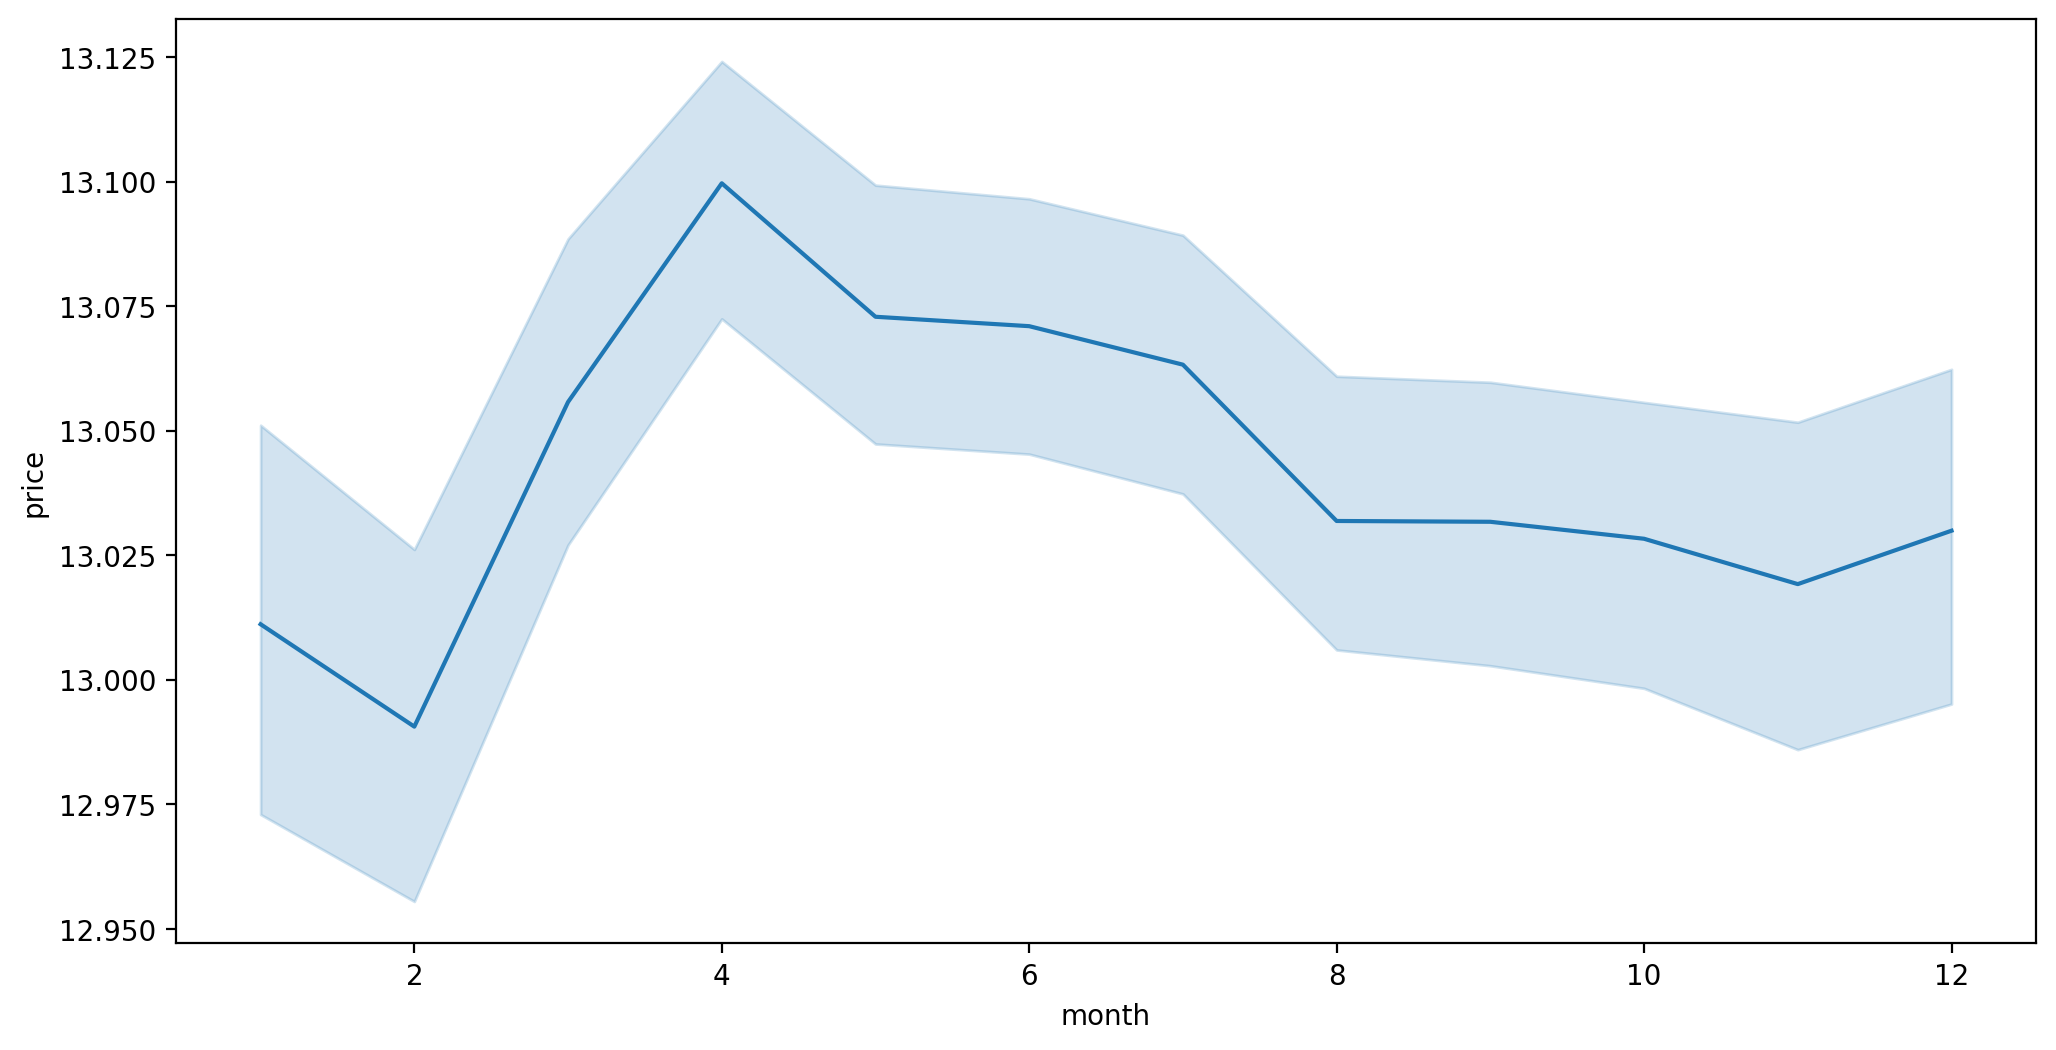

In [29]:
# month - price; 선그래프; 4월이 가장 높음
fig, ax = plt.subplots(figsize=(12,6))
sns.lineplot(x='month', y=y, data=train, ax=ax)

In [30]:
# year - month
train.pivot_table(index = 'month', columns = 'year', values = 'price', aggfunc = 'mean')

year,2014,2015
month,,
1,NaN,526782.397974
2,NaN,510550.813539
3,NaN,546050.748462
4,NaN,562234.612459
5,549649.856230,576398.908482
6,549902.546667,NaN
7,546033.214918,NaN
8,533536.653196,NaN
9,532016.436838,NaN


## 이상치 제거

In [31]:
# sqft_living max 값 확인
train[train['sqft_living'] == train['sqft_living'].max()]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month
8912,8912,201405,2280000.0,7,8.0,13540,307752,3.0,0,4,...,4130,1999,0,98053,47.6675,-121.986,4850,217800,2014,5


In [32]:
# sqft_living15 max 삭제
train.drop(8912, axis=0, inplace=True)

In [33]:
# sqft_lot max 값 확인
train[train['sqft_lot'] == train['sqft_lot'].max()]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month
1231,1231,201503,700000.0,4,1.0,1300,1651359,1.0,0,3,...,0,1920,0,98022,47.2313,-122.023,2560,425581,2015,3


In [34]:
# sqft_lot15 max 값 삭제
train.drop(1717, axis=0, inplace=True)

In [35]:
train[train['grade'] == 3]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month
2302,2302,201502,262000.0,1,0.75,520,12981,1.0,0,0,...,0,1920,0,98022,47.2082,-121.995,1340,12233,2015,2
4123,4123,201411,280000.0,1,0.00,600,24501,1.0,0,0,...,0,1950,0,98045,47.5316,-121.749,990,22549,2014,11


In [36]:
# 이상치 제거 - grade 3인 데이터 제거
train.drop([2302, 4123], axis=0, inplace=True)

In [37]:
# grade 11인 데이터 중 가격 젤 높은 데이터, 면적이 커서 우선 나둠(제거 후순위)
train[train['grade'] == 11].sort_values(by='price', ascending=False)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month
2775,2775,201406,7062500.0,5,4.50,10040,37325,2.0,1,2,...,2360,1940,2001,98004,47.6500,-122.214,3930,25449,2014,6
1499,1499,201411,3850000.0,4,4.25,5770,21300,2.0,1,4,...,0,1980,0,98040,47.5850,-122.222,4620,22748,2014,11
4598,4598,201504,3650000.0,6,4.75,5480,19401,1.5,1,4,...,1570,1936,0,98105,47.6515,-122.277,3510,15810,2015,4
10645,10645,201409,3640900.0,4,3.25,4830,22257,2.0,1,4,...,0,1990,0,98039,47.6409,-122.241,3820,25582,2014,9
7297,7297,201505,3400000.0,4,4.00,4260,11765,2.0,0,0,...,980,1939,2010,98112,47.6380,-122.288,4260,10408,2015,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4536,4536,201408,725000.0,3,2.50,3410,41022,2.0,0,0,...,0,1990,0,98042,47.3228,-122.080,2150,21429,2014,8
9849,9849,201406,657500.0,4,2.75,4140,24190,2.0,0,0,...,0,2002,0,98092,47.3062,-122.150,3950,24190,2014,6
12308,12308,201412,633000.0,5,2.75,3630,30570,2.0,0,0,...,0,2000,0,98058,47.4243,-122.097,3620,41965,2014,12
943,943,201405,556000.0,5,2.50,3840,16905,2.0,0,0,...,0,1991,0,98023,47.2996,-122.342,3270,12133,2014,5


In [38]:
# bathroom 이상치, bathrooms == 4.5max(grade랑 같은 데이터), 5.25 min
train[train['bathrooms'] == 4.5].sort_values(by='price', ascending=False)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month
2775,2775,201406,7062500.0,5,4.5,10040,37325,2.0,1,2,...,2360,1940,2001,98004,47.6500,-122.214,3930,25449,2014,6
5621,5621,201406,3400000.0,3,4.5,5230,17826,2.0,1,4,...,1490,2005,0,98040,47.5348,-122.243,3670,17826,2014,6
14016,14016,201503,2945000.0,5,4.5,4340,5722,3.0,0,4,...,0,2010,0,98107,47.6715,-122.406,1770,5250,2015,3
9555,9555,201412,2600000.0,4,4.5,5270,12195,2.0,1,4,...,1870,1979,0,98027,47.5696,-122.090,3390,9905,2014,12
11718,11718,201410,2500000.0,4,4.5,4300,19844,2.0,0,0,...,0,1985,1999,98039,47.6218,-122.237,3070,19845,2014,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
841,841,201409,482500.0,6,4.5,2940,7500,1.5,0,0,...,0,1966,0,98034,47.7208,-122.182,2010,7500,2014,9
5045,5045,201502,460000.0,5,4.5,3100,7260,2.0,0,0,...,0,1963,2000,98059,47.5004,-122.162,1650,7700,2015,2
6370,6370,201409,350000.0,6,4.5,3500,8504,2.0,0,0,...,0,1980,0,98155,47.7351,-122.295,1550,8460,2014,9
14711,14711,201501,303500.0,6,4.5,3390,7200,2.0,0,0,...,950,2007,0,98118,47.5205,-122.288,2040,7214,2015,1


In [39]:
# 집 작고, 오래됨, 재건축도 x -> 이해됨
train[train['bathrooms'] == 5.25].sort_values(by='price', ascending=True)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month
11701,11701,201405,300000.0,6,5.25,2860,5682,2.0,0,0,...,0,1978,0,98002,47.3030,-122.221,1390,5956,2014,5
3270,3270,201411,643500.0,6,5.25,3600,3960,2.0,0,0,...,1200,1971,0,98126,47.5656,-122.372,1450,4600,2014,11
9280,9280,201408,1148000.0,10,5.25,4590,10920,1.0,0,2,...,2090,2008,0,98004,47.5861,-122.113,2730,10400,2014,8
14475,14475,201408,1275000.0,6,5.25,6160,27490,2.0,0,0,...,2120,2007,0,98074,47.6094,-122.023,4225,9100,2014,8
2228,2228,201411,1320000.0,4,5.25,6110,10369,2.0,0,0,...,0,2005,0,98059,47.5285,-122.135,4190,10762,2014,11
12814,12814,201406,1415000.0,4,5.25,4670,43950,2.0,0,0,...,0,1989,0,98006,47.5456,-122.126,4900,35000,2014,6
12714,12714,201407,1862000.0,4,5.25,5240,320917,2.0,0,2,...,0,2006,0,98024,47.5605,-121.905,1930,68824,2014,7
13980,13980,201504,2250000.0,5,5.25,3410,8118,2.0,0,0,...,0,2006,0,98039,47.6295,-122.236,3410,16236,2015,4
12436,12436,201407,2458000.0,4,5.25,6500,14986,2.0,0,0,...,1320,2001,0,98039,47.6304,-122.236,2270,8119,2014,7
11805,11805,201407,3100000.0,5,5.25,5090,23669,2.0,0,0,...,0,2006,0,98004,47.6297,-122.216,3830,22605,2014,7


In [40]:
train

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month
0,0,201410,221900.0,3,1.00,1180,5650,1.0,0,0,...,0,1955,0,98178,47.5112,-122.257,1340,5650,2014,10
1,1,201502,180000.0,2,1.00,770,10000,1.0,0,0,...,0,1933,0,98028,47.7379,-122.233,2720,8062,2015,2
2,2,201502,510000.0,3,2.00,1680,8080,1.0,0,0,...,0,1987,0,98074,47.6168,-122.045,1800,7503,2015,2
3,3,201406,257500.0,3,2.25,1715,6819,2.0,0,0,...,0,1995,0,98003,47.3097,-122.327,2238,6819,2014,6
4,4,201501,291850.0,3,1.50,1060,9711,1.0,0,0,...,0,1963,0,98198,47.4095,-122.315,1650,9711,2015,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15030,15030,201410,610685.0,4,2.50,2520,6023,2.0,0,0,...,0,2014,0,98056,47.5137,-122.167,2520,6023,2014,10
15031,15031,201503,1007500.0,4,3.50,3510,7200,2.0,0,0,...,910,2009,0,98136,47.5537,-122.398,2050,6200,2015,3
15032,15032,201405,360000.0,3,2.50,1530,1131,3.0,0,0,...,0,2009,0,98103,47.6993,-122.346,1530,1509,2014,5
15033,15033,201502,400000.0,4,2.50,2310,5813,2.0,0,0,...,0,2014,0,98146,47.5107,-122.362,1830,7200,2015,2


In [41]:
# skewness data scaling - log1p
skew_col = ['sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement', 'sqft_living15', 'sqft_lot15']

for col in skew_col:
    train[col] = np.log1p(train[col])
    test[col] = np.log1p(test[col])
    
# skewness 확인
for col in skew_col:
    print(f'{col} skewness : {train[col].skew():.2f}')

sqft_living skewness : -0.04
sqft_lot skewness : 0.99
sqft_above skewness : 0.24
sqft_basement skewness : 0.49
sqft_living15 skewness : 0.21
sqft_lot15 skewness : 0.99


In [42]:
# zipcode, lat, long을 활용한 지역 클러스터링
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

reg_clust = train[['zipcode', 'lat', 'long', 'price']]

scaler = StandardScaler()
reg_clust[['lat_scaled', 'long_scaled']] = scaler.fit_transform(reg_clust[['lat', 'long']])
reg_clust['price']= np.log1p(reg_clust['price'])

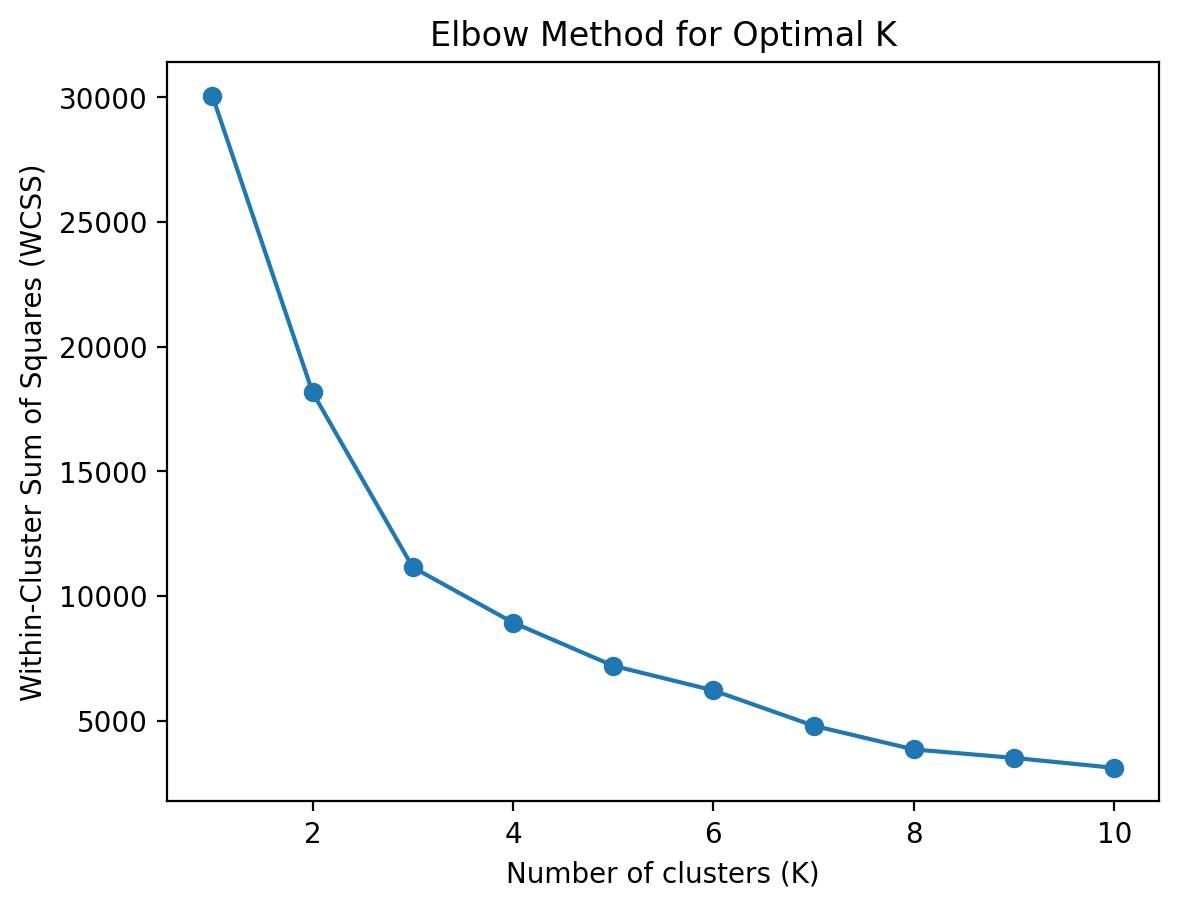

In [43]:
# 최적의 K 찾기: 엘보우 방법
wcss = []
k_values = range(1, 11)
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(reg_clust[['lat_scaled', 'long_scaled']])
    wcss.append(kmeans.inertia_)  # WCSS 값

plt.plot(k_values, wcss, marker='o')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.title('Elbow Method for Optimal K')
plt.show()

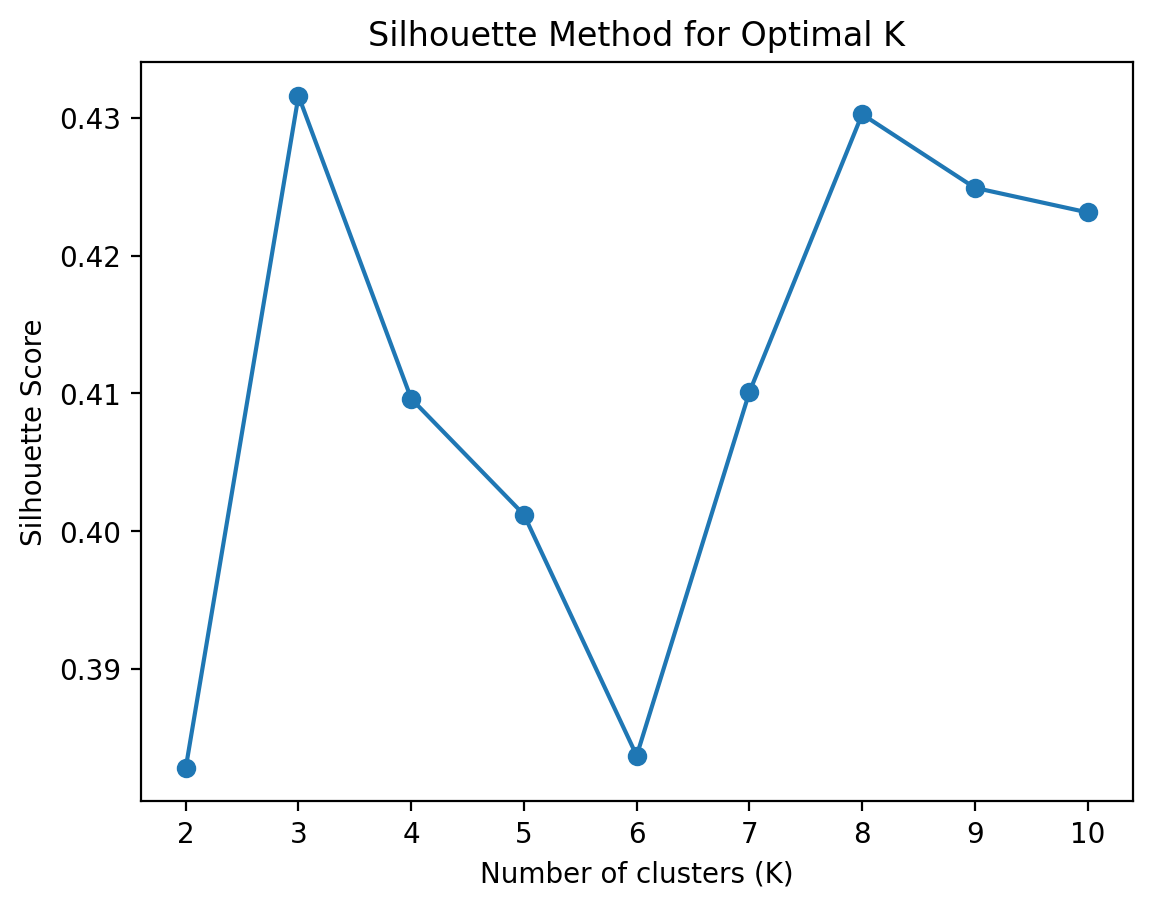

In [44]:
# 최적의 K 찾기: 실루엣 계수
silhouette_scores = []
for k in range(2, 11):  # 실루엣 계수는 최소 2개의 클러스터 필요
    kmeans = KMeans(n_clusters=k, random_state=0)
    labels = kmeans.fit_predict(reg_clust[['lat_scaled', 'long_scaled']])
    silhouette_scores.append(silhouette_score(reg_clust[['lat_scaled', 'long_scaled']], labels))

plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Method for Optimal K')
plt.show()

In [45]:
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=0)
reg_clust['cluster'] = kmeans.fit_predict(reg_clust[['lat_scaled', 'long_scaled']])

# 각 클러스터별 평균 집값 계산
cluster_price_mean = reg_clust.groupby('cluster')['price'].mean()
cluster_price_mean

cluster
0    13.306882
1    13.186637
2    12.646252
Name: price, dtype: float64

In [46]:
# train data에 cluster 추가
train['cluster'] = reg_clust['cluster']
train

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month,cluster
0,0,201410,221900.0,3,1.00,7.074117,8.639588,1.0,0,0,...,1955,0,98178,47.5112,-122.257,7.201171,8.639588,2014,10,2
1,1,201502,180000.0,2,1.00,6.647688,9.210440,1.0,0,0,...,1933,0,98028,47.7379,-122.233,7.908755,8.995041,2015,2,1
2,2,201502,510000.0,3,2.00,7.427144,8.997271,1.0,0,0,...,1987,0,98074,47.6168,-122.045,7.496097,8.923191,2015,2,0
3,3,201406,257500.0,3,2.25,7.447751,8.827615,2.0,0,0,...,1995,0,98003,47.3097,-122.327,7.713785,8.827615,2014,6,2
4,4,201501,291850.0,3,1.50,6.966967,9.181118,1.0,0,0,...,1963,0,98198,47.4095,-122.315,7.409136,9.181118,2015,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15030,15030,201410,610685.0,4,2.50,7.832411,8.703507,2.0,0,0,...,2014,0,98056,47.5137,-122.167,7.832411,8.703507,2014,10,2
15031,15031,201503,1007500.0,4,3.50,8.163656,8.881975,2.0,0,0,...,2009,0,98136,47.5537,-122.398,7.626083,8.732466,2015,3,1
15032,15032,201405,360000.0,3,2.50,7.333676,7.031741,3.0,0,0,...,2009,0,98103,47.6993,-122.346,7.333676,7.319865,2014,5,1
15033,15033,201502,400000.0,4,2.50,7.745436,8.668024,2.0,0,0,...,2014,0,98146,47.5107,-122.362,7.512618,8.881975,2015,2,1


In [47]:
# test data에 cluster 예측
test_data = test[['zipcode', 'lat', 'long']]
test_data[['lat_scaled', 'long_scaled']] = scaler.transform(test_data[['lat', 'long']])

In [48]:
test['cluster'] = kmeans.predict(test_data[['lat_scaled', 'long_scaled']])
test

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month,cluster
0,15035,201412,3,2.25,7.852050,8.887791,2.0,0,0,3,...,1951,1991,98125,47.7210,-122.319,7.433075,8.941153,2014,12,1
1,15036,201412,4,3.00,7.581210,8.517393,1.0,0,0,5,...,1965,0,98136,47.5208,-122.393,7.215975,8.517393,2014,12,1
2,15037,201405,4,4.50,8.598036,11.532051,1.0,0,0,3,...,2001,0,98053,47.6561,-122.005,8.468213,11.532051,2014,5,0
3,15038,201504,3,1.00,7.484930,8.918784,1.0,0,0,3,...,1960,0,98146,47.5123,-122.337,7.484930,9.001346,2015,4,1
4,15039,201503,3,2.50,7.544861,8.788898,2.0,0,0,3,...,2003,0,98038,47.3684,-122.031,7.779467,8.932080,2015,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6463,21498,201406,3,1.75,7.313887,9.390075,1.0,0,0,3,...,2014,0,98010,47.3095,-122.002,7.186144,9.332912,2014,6,2
6464,21499,201501,3,2.00,7.307202,7.027315,3.0,0,0,3,...,2014,0,98144,47.5699,-122.288,7.244942,7.115582,2015,1,1
6465,21500,201502,3,2.50,7.178545,7.166266,2.0,0,0,3,...,2008,0,98116,47.5773,-122.409,7.193686,7.143618,2015,2,1
6466,21501,201406,2,0.75,6.928538,7.208600,2.0,0,0,3,...,2009,0,98144,47.5944,-122.299,6.928538,7.604894,2014,6,1


In [49]:
train.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15', 'year', 'month',
       'cluster'],
      dtype='object')

In [50]:
y = train['price']
y = np.log1p(y)

In [51]:
train.drop(['id','date','price'], axis=1, inplace=True)
test.drop(['id','date'], axis=1, inplace=True)

In [52]:
display(train.head(), test.head())

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month,cluster
0,3,1.00,7.074117,8.639588,1.0,0,0,3,7,7.074117,...,1955,0,98178,47.5112,-122.257,7.201171,8.639588,2014,10,2
1,2,1.00,6.647688,9.210440,1.0,0,0,3,6,6.647688,...,1933,0,98028,47.7379,-122.233,7.908755,8.995041,2015,2,1
2,3,2.00,7.427144,8.997271,1.0,0,0,3,8,7.427144,...,1987,0,98074,47.6168,-122.045,7.496097,8.923191,2015,2,0
3,3,2.25,7.447751,8.827615,2.0,0,0,3,7,7.447751,...,1995,0,98003,47.3097,-122.327,7.713785,8.827615,2014,6,2
4,3,1.50,6.966967,9.181118,1.0,0,0,3,7,6.966967,...,1963,0,98198,47.4095,-122.315,7.409136,9.181118,2015,1,2


,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month,cluster
0,3,2.25,7.852050,8.887791,2.0,0,0,3,7,7.682943,...,1951,1991,98125,47.7210,-122.319,7.433075,8.941153,2014,12,1
1,4,3.00,7.581210,8.517393,1.0,0,0,5,7,6.957497,...,1965,0,98136,47.5208,-122.393,7.215975,8.517393,2014,12,1
2,4,4.50,8.598036,11.532051,1.0,0,0,3,11,8.266421,...,2001,0,98053,47.6561,-122.005,8.468213,11.532051,2014,5,0
3,3,1.00,7.484930,8.918784,1.0,0,0,3,7,6.957497,...,1960,0,98146,47.5123,-122.337,7.484930,9.001346,2015,4,1
4,3,2.50,7.544861,8.788898,2.0,0,0,3,7,7.544861,...,2003,0,98038,47.3684,-122.031,7.779467,8.932080,2015,3,2


## 모델링

In [53]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [54]:
def rmse(y_test, y_pred):
    return np.sqrt(mean_squared_error(np.expm1(y_test), np.expm1(y_pred)))

In [55]:
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor

random_state=930        

gboost = GradientBoostingRegressor(random_state=random_state)
xgboost = XGBRegressor(random_state=random_state)
lightgbm = LGBMRegressor(random_state=random_state)
rdforest = RandomForestRegressor(random_state=random_state)

models = [gboost, xgboost, lightgbm, rdforest]

gboost.__class__.__name__

'GradientBoostingRegressor'

In [56]:
# for문안에 모델별 학습 및 예측

df = {}

for model in models:
    model_name = model.__class__.__name__
    
    # train/test split
    X_train, X_test, y_train, y_test = train_test_split(train, y, random_state=random_state, test_size=0.2)
    
    # 모델 학습
    model.fit(X_train, y_train)
    
    # 예측
    y_pred = model.predict(X_test)
    
    # 예측 결과의 rmse값 저장
    df[model_name] = rmse(y_test, y_pred)
    
    # data frame에 저장
    score_df = pd.DataFrame(df, index=['RMSE']).T.sort_values('RMSE', ascending=False)

df
    

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000731 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2303
[LightGBM] [Info] Number of data points in the train set: 12024, number of used features: 21
[LightGBM] [Info] Start training from score 13.050923


{'GradientBoostingRegressor': np.float64(134616.82264006147),
 'XGBRegressor': np.float64(122231.72206167568),
 'LGBMRegressor': np.float64(116359.57666959056),
 'RandomForestRegressor': np.float64(121291.3378289119)}

In [57]:
# get_scores 함수로 위의 과정을 함수로 만들기

def get_scores(models, train, y):
    df = {}
    for model in models:
        model_name = model.__class__.__name__

        X_train, X_test, y_train, y_test = train_test_split(train, y, random_state=random_state, test_size=0.2)

        model.fit(X_train, y_train)

        y_pred = model.predict(X_test)

        df[model_name] = rmse(y_test, y_pred)

        score_df = pd.DataFrame(df, index=['RMSE']).T.sort_values('RMSE', ascending=False)
        
    return score_df

get_scores(models, train, y)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000690 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2303
[LightGBM] [Info] Number of data points in the train set: 12024, number of used features: 21
[LightGBM] [Info] Start training from score 13.050923


,RMSE
GradientBoostingRegressor,134616.822640
XGBRegressor,122231.722062
RandomForestRegressor,121291.337829
LGBMRegressor,116359.576670


In [58]:
from sklearn.model_selection import GridSearchCV

def my_GridSearch(model, train, y, param_grid, verbose=2, n_jobs=5):
    grid_model = GridSearchCV(model, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5, verbose=verbose, n_jobs=n_jobs)
    
    grid_model.fit(train, y)
    
    params = grid_model.cv_results_['params']
    score = grid_model.cv_results_['mean_test_score']
    
    results = pd.DataFrame(params)
    results['score'] = score
    
    results['RMSLE'] = np.sqrt(-1 * results['score'])
    results = results.sort_values('RMSLE')
    
    return results

In [59]:

param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [1, 10],
}
model = LGBMRegressor(random_state=random_state)
my_GridSearch(model, train, y, param_grid, verbose=2, n_jobs=5)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002309 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002718 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2302
[LightGBM] [Info] Total Bins 2335
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002108 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2330
[LightGBM] [Info] Number of data points in the train set: 12025, number of used features: 21
[LightGBM] [Info] Number of data points in the train set: 12025, number of used features: 21
[LightGBM] [Info] Number of data point

,max_depth,n_estimators,score,RMSLE
3,10,100,-0.027173,0.164843
2,10,50,-0.029402,0.171470
1,1,100,-0.055011,0.234544
0,1,50,-0.073346,0.270824


In [61]:
model = LGBMRegressor(max_depth=10, n_estimators=100, random_state=random_state)
model.fit(train, y)
prediction = model.predict(test)
prediction

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001456 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2341
[LightGBM] [Info] Number of data points in the train set: 15031, number of used features: 21
[LightGBM] [Info] Start training from score 13.048117


array([13.13002887, 13.05305028, 14.13813478, ..., 13.04329914,
       12.68761386, 12.99582757])

In [62]:
# 예측한 값에 expm1을 취해준다.
prediction = np.expm1(prediction)
prediction

array([ 503846.47215733,  466516.25089369, 1380745.39628299, ...,
        461989.28441892,  323712.40772708,  440570.29692619])

In [63]:
def save_submission(model, train, y, test, model_name, rmsle):
    model.fit(train, y)
    prediction = model.predict(test)
    prediction = np.expm1(prediction)
    
    data_dir = '/Users/mj/Library/CloudStorage/OneDrive-개인/AI_study/data/2019-2nd-ml-month-with-kakr'
    submission_path = join(data_dir, 'sample_submission.csv')
    submission = pd.read_csv(submission_path)
    
    submission['price'] = prediction
    submission_csv_path = '{}/submission_{}_RMSLE_{}.csv'.format(data_dir, model_name, rmsle)
    submission.to_csv(submission_csv_path, index=False)
    print(f'{submission_csv_path} saved')

In [64]:
save_submission(model, train, y, test, 'lgbm', rmsle='0.164843')

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000945 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2341
[LightGBM] [Info] Number of data points in the train set: 15031, number of used features: 21
[LightGBM] [Info] Start training from score 13.048117
/Users/mj/Library/CloudStorage/OneDrive-개인/AI_study/data/2019-2nd-ml-month-with-kakr/submission_lgbm_RMSLE_0.164843.csv saved
